# Part 2:  EDA on Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from skmultilearn.problem_transform import LabelPowerset
from collections import OrderedDict

## Setup and basic info about dataset

### 1. Read data and feature descriptions in from CSV files

In [2]:
df = pd.read_csv('../data/multilabel_with_tol_raw_data.csv')
df2 = pd.read_csv('../data/multiclass_raw_data.csv')

features = pd.read_csv('../data/features_plus_descriptions.csv')
features.set_index('Feature Type and Number', inplace=True)

H_Best = ['H0_Best', 'H1_Best', 'H2_Best', 'H3_Best', 'H4_Best', 'H5_Best']

y_tol = df[H_Best]
X = df.drop(H_Best, axis=1)
y = df2['Best Heuristic']

### 2. Display features and descriptions

In [3]:
features

Description
Feature Type and Number                                                   
S1                               Fraction of clauses that are unit clauses
S2                               Fraction of clauses that are Horn clauses
S3                             Fraction of clauses that are ground Clauses
S4                               Fraction of clauses that are demodulators
S5                       Fraction of clauses that are rewrite rules (or...
S6                            Fraction of clauses that are purely positive
S7                            Fraction of clauses that are purely negative
S8                       Fraction of clauses that are mixed positive an...
S9                                                   Maximum clause length
S10                                                  Average clause length
S11                                                   Maximum clause depth
S12                                                   Average clause depth
S13                                                  Maximum clause weight
S14                                                  Average clause weight
D1                       Proportion of generated clauses kept (trivial ...
D2                       Sharing factor (A measure of the number of sha...
D3                                                             |P|/|P ∪ U|
D4                                                                 |U|/|A|
D5                              Ratio of longest clause lengths in P and A
D6                              Ratio of average clause lengths in P and A
D7                              Ratio of longest clause lengths in U and A
D8                              Ratio of average clause lengths in U and A
D9                               Ratio of maximum clause depths in P and A
D10                              Ratio of average clause depths in P and A
D11                              Ratio of maximum clause depths in U and A
D12                              Ratio of average clause depths in U and A
D13                      Ratio of maximum clause standard weights in P ...
D14                      Ratio of average clause standard weights in P ...
D15                      Ratio of maximum clause standard weights in U ...
D16                      Ratio of average clause standard weights in U ...
D17                          Ratio of the number of trivial clauses to |P|
D18                      Ratio of the number of forward subsumed clause...
D19                      Ratio of the number of non-trivial clauses to |P|
D20                      Ratio of the number of other redundant clauses...
D21                      Ratio of the number of non-redundant deleted c...
D22                      Ratio of the number of backward subsumed claus...
D23                      Ratio of the number of backward rewritten clau...
D24                      Ratio of the number of backward rewritten lite...
D25                        Ratio of the number of generated clauses to |P|
D26                      Ratio of the number of generated literal claus...
D27                      Ratio of the number of generated non-trivial c...
D28                                                   context sr count/|P|
D29                                        Ratio of paramodulations to |P|
D30                                                       factor count/|P|
D31                                                       resolv count/|P|
D32                                          Fraction of unit clauses in U
D33                                          Fraction of Horn clauses in U
D34                                        Fraction of ground clauses in U
D35                                   Fraction of demodulator clauses in U
D36                                Fraction of rewrite rule clauses in |U|
D37                      Fraction of clauses with only positive literal...
D38                      Fraction of clauses with only negative literal...
D39          

### 3. Shape of dataset and first five rows

In [4]:
print(df.shape[0], 'rows')
print(df.shape[1], 'cols')
df.head()

6118 rows
59 cols


S1       S2       S3       S4  S5       S6        S7       S8  S9  \
0  0.83307  0.99682  0.83307  0.76789   0  0.76948  0.069952  0.16057   6   
1  0.83307  0.99682  0.83307  0.76948   0  0.77107  0.068363  0.16057   6   
2  0.83307  0.99682  0.83307  0.76789   0  0.76948  0.069952  0.16057   6   
3  0.83307  0.99682  0.83307  0.76789   0  0.76948  0.069952  0.16057   6   
4  0.83307  0.99682  0.83307  0.76789   0  0.76948  0.069952  0.16057   6   

      S10  ...      D36      D37       D38      D39  H0_Best  H1_Best  \
0  1.2734  ...  0.00188  0.73872  0.073308  0.18797        1        0   
1  1.2734  ...  0.00188  0.74436  0.067669  0.18797        0        1   
2  1.2734  ...  0.00188  0.74248  0.069549  0.18797        1        0   
3  1.2734  ...  0.00188  0.73120  0.080827  0.18797        1        0   
4  1.2734  ...  0.00188  0.73308  0.078947  0.18797        1        0   

   H2_Best  H3_Best  H4_Best  H5_Best  
0        0        0        0        0  
1        1        0        1        1  
2        0        0        0        0  
3        0        0        0        0  
4        0        0        0        0  

[5 rows x 59 columns]

### 4. EDA on features

In [5]:
SMALL_SIZE = 10
MEDIUM_SIZE = 11
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE, dpi=100)  # fontsize of the figure title

color='xkcd:purple blue'
nbins = 36

### Single Column Histograms
* All attributes in the raw data are numeric and were considered to be continuous, plotted with histogram.
* Attributes S5 is the same for all features, and so is attribute D21; both are integer values. 
* Attributes S9, S11, S13 are integer valued.

count    6118.000000
mean        0.367852
std         0.313888
min         0.000000
25%         0.114573
50%         0.235290
75%         0.593355
max         1.000000
Name: S1, dtype: float64


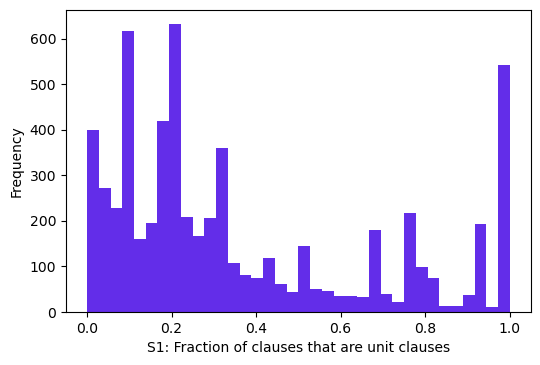

count    6118.000000
mean        0.830860
std         0.213030
min         0.007812
25%         0.769408
50%         0.911770
75%         1.000000
max         1.000000
Name: S2, dtype: float64


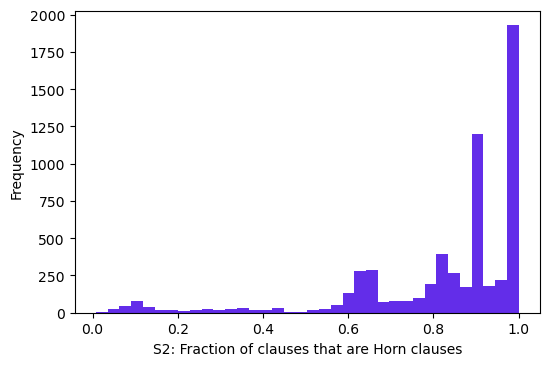

count    6118.000000
mean        0.264259
std         0.268266
min         0.000000
25%         0.101690
50%         0.136840
75%         0.333330
max         1.000000
Name: S3, dtype: float64


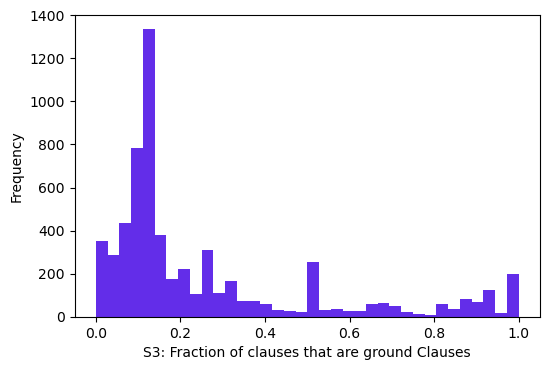

count    6118.000000
mean        0.300741
std         0.263988
min         0.000000
25%         0.100000
50%         0.200000
75%         0.483870
max         1.000000
Name: S4, dtype: float64


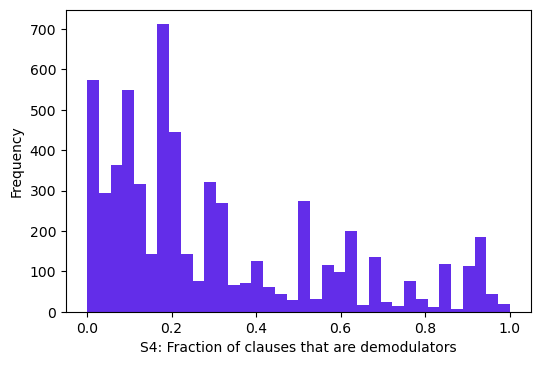

count    6118.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: S5, dtype: float64


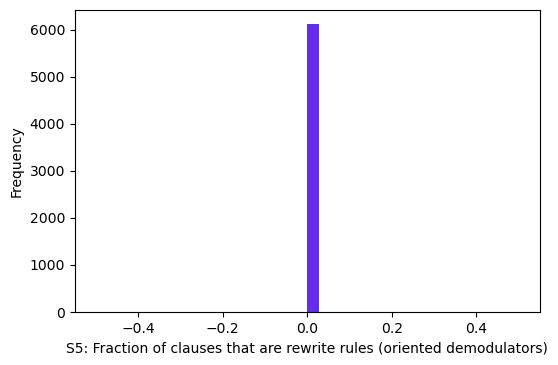

count    6118.000000
mean        0.357758
std         0.269641
min         0.000382
25%         0.144055
50%         0.250895
75%         0.500000
max         1.000000
Name: S6, dtype: float64


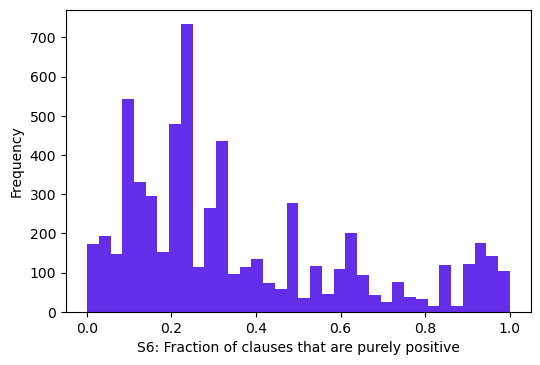

count    6118.000000
mean        0.106189
std         0.119298
min         0.000000
25%         0.031915
50%         0.069952
75%         0.116280
max         0.982140
Name: S7, dtype: float64


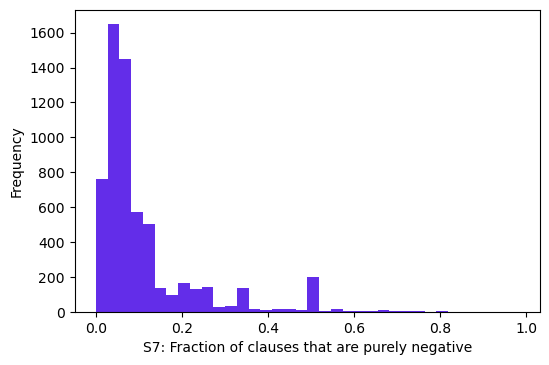

count    6118.000000
mean        0.536053
std         0.302384
min         0.000000
25%         0.250000
50%         0.645390
75%         0.766420
max         0.996600
Name: S8, dtype: float64


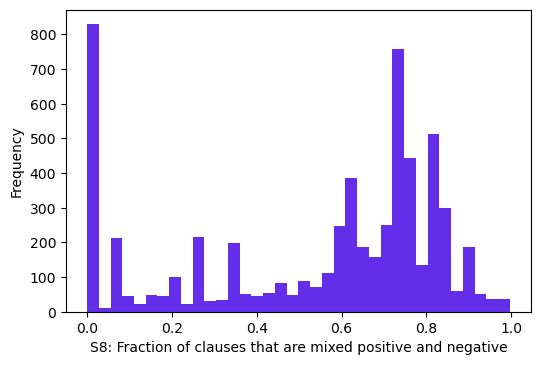

count    6118.000000
mean        7.081399
std         7.303454
min         1.000000
25%         4.000000
50%         5.000000
75%        10.000000
max       244.000000
Name: S9, dtype: float64


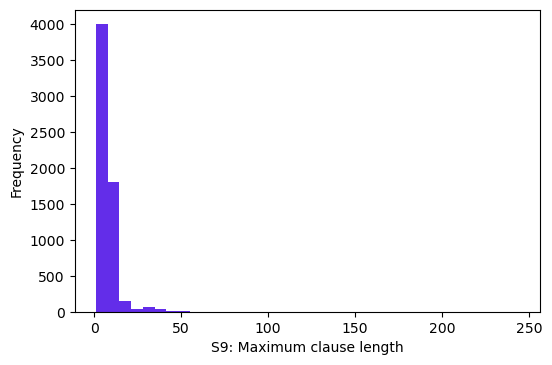

count    6118.000000
mean        2.640024
std         2.274133
min         1.000000
25%         1.811000
50%         2.193600
75%         3.034500
max        39.070000
Name: S10, dtype: float64


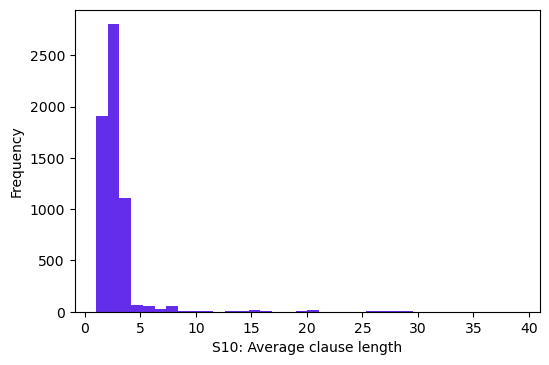

count    6118.000000
mean        7.725727
std         7.396474
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        86.000000
Name: S11, dtype: float64


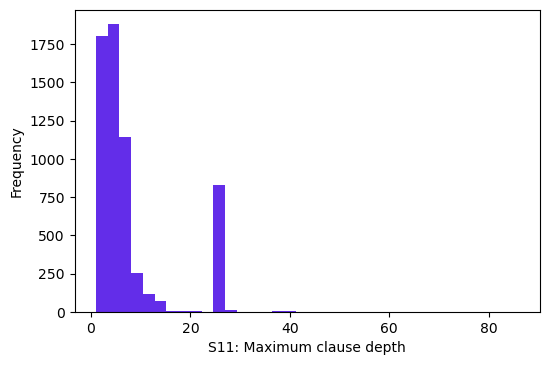

count    6118.000000
mean        2.755282
std         0.938847
min         1.000000
25%         2.113700
50%         2.320500
75%         3.682100
max        11.000000
Name: S12, dtype: float64


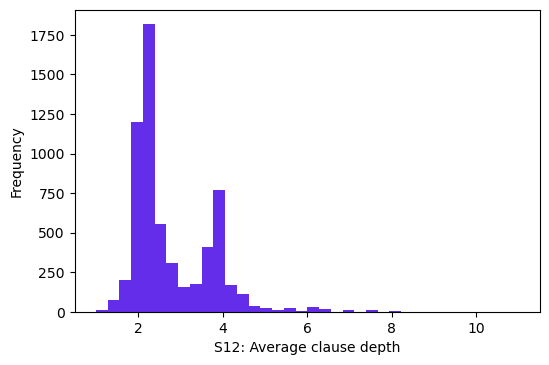

count     6118.000000
mean       159.764466
std        318.136026
min         12.000000
25%         36.000000
50%         61.000000
75%        119.750000
max      16240.000000
Name: S13, dtype: float64


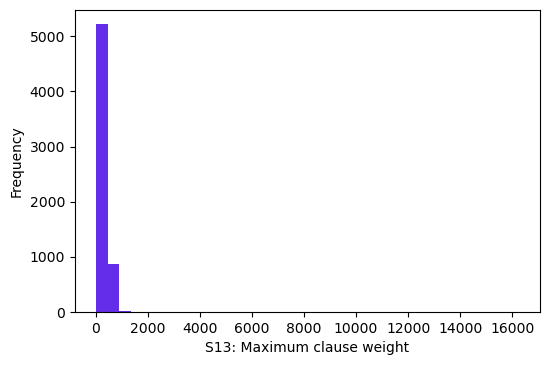

count    6118.000000
mean       26.838050
std        38.296636
min         4.464300
25%        16.316000
50%        19.435000
75%        26.551500
max       990.140000
Name: S14, dtype: float64


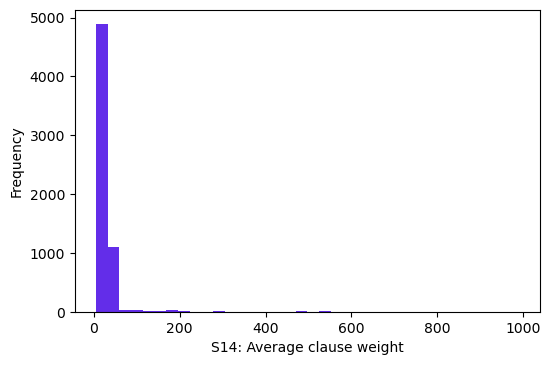

count    6118.00000
mean        0.84510
std         0.20275
min         0.14141
25%         0.73737
50%         0.94949
75%         0.98990
max         1.00000
Name: D1, dtype: float64


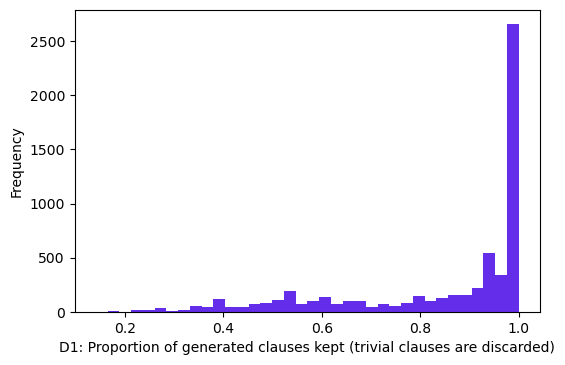

count    6118.000000
mean       14.237979
std        42.391457
min         0.048106
25%         5.679675
50%         7.144450
75%         9.414350
max      1477.700000
Name: D2, dtype: float64


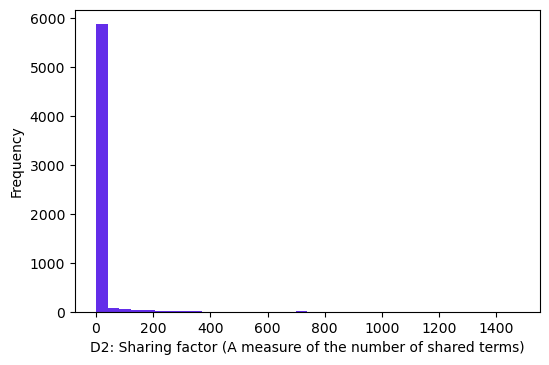

count    6118.000000
mean        0.322387
std         0.178269
min         0.003150
25%         0.184598
50%         0.363300
75%         0.433180
max         0.979170
Name: D3, dtype: float64


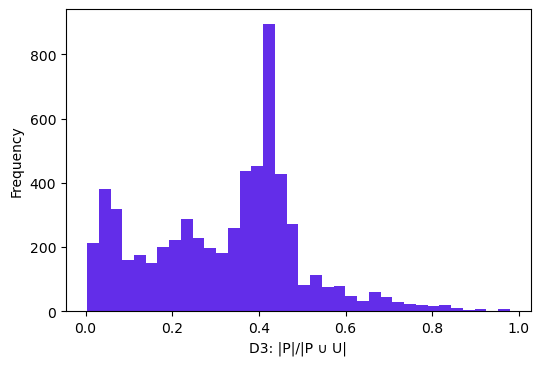

count    6118.000000
mean       62.371469
std       383.470210
min         0.016667
25%         0.863393
50%         1.379300
75%         7.590900
max      7010.000000
Name: D4, dtype: float64


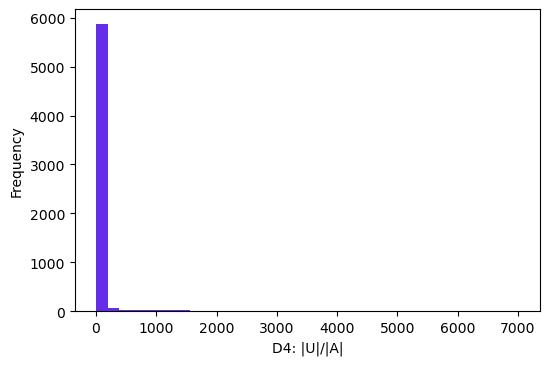

count    6118.000000
mean        0.790348
std         0.364599
min         0.004098
25%         0.454540
50%         1.000000
75%         1.000000
max         3.000000
Name: D5, dtype: float64


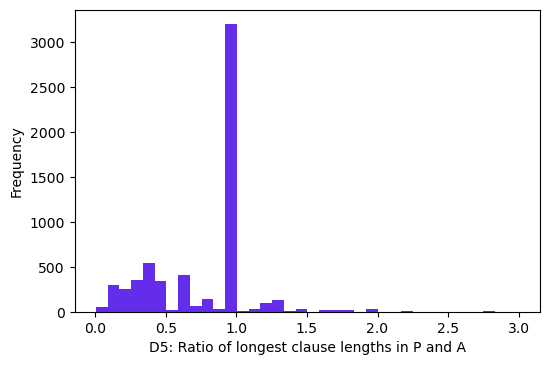

count    6118.000000
mean        0.863568
std         0.308731
min         0.044484
25%         0.664390
50%         0.911340
75%         1.000000
max         3.795400
Name: D6, dtype: float64


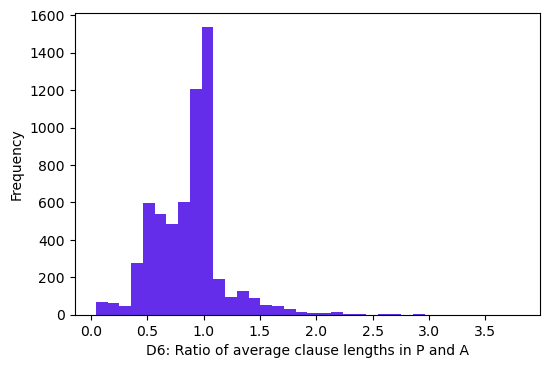

count    6118.000000
mean        1.094095
std         0.320187
min         0.031250
25%         1.000000
50%         1.000000
75%         1.250000
max         5.000000
Name: D7, dtype: float64


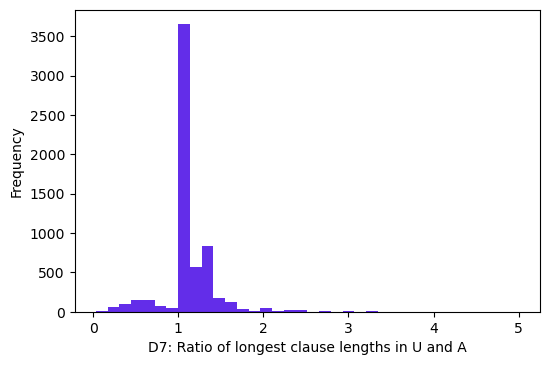

count    6118.000000
mean        1.321934
std         0.583066
min         0.214830
25%         1.050950
50%         1.259050
75%         1.391500
max        27.052000
Name: D8, dtype: float64


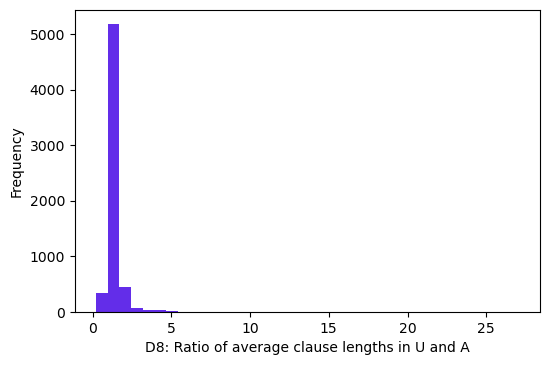

count    6118.000000
mean        0.986807
std         0.454212
min         0.076923
25%         0.600000
50%         1.000000
75%         1.000000
max         7.500000
Name: D9, dtype: float64


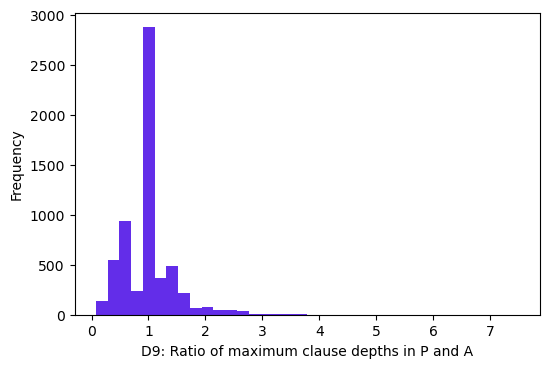

count    6118.000000
mean        1.007918
std         0.205819
min         0.292570
25%         0.917253
50%         1.000000
75%         1.043550
max         2.752500
Name: D10, dtype: float64


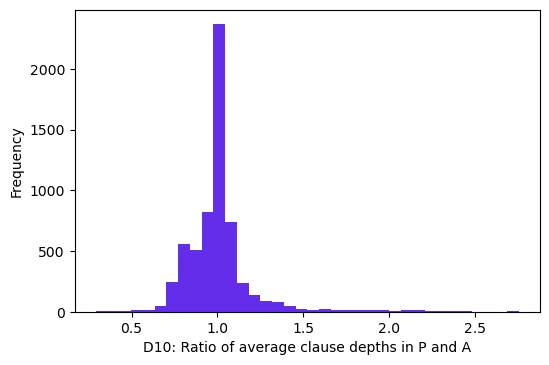

count    6118.000000
mean        1.333808
std         0.701452
min         0.230770
25%         1.000000
50%         1.000000
75%         1.400000
max         8.333300
Name: D11, dtype: float64


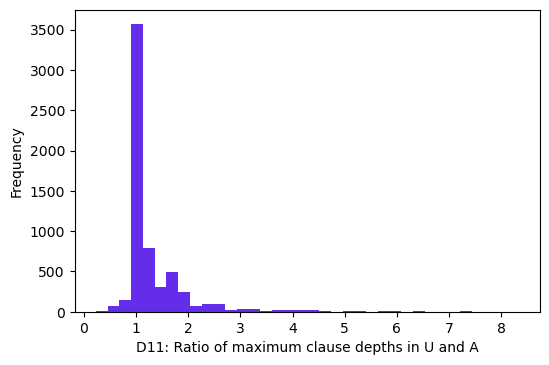

count    6118.000000
mean        1.185659
std         0.387314
min         0.544180
25%         1.000000
50%         1.052550
75%         1.247600
max         4.841400
Name: D12, dtype: float64


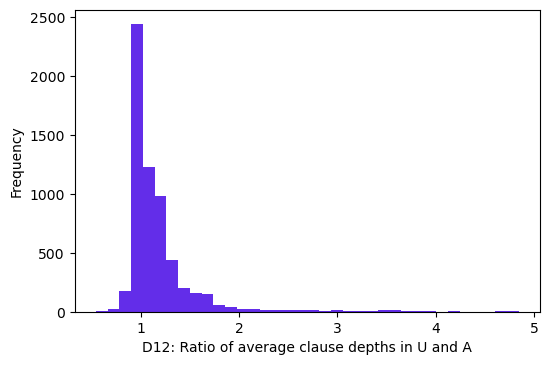

count    6118.000000
mean        0.829343
std         0.800242
min         0.001757
25%         0.311480
50%         1.000000
75%         1.000000
max        13.647000
Name: D13, dtype: float64


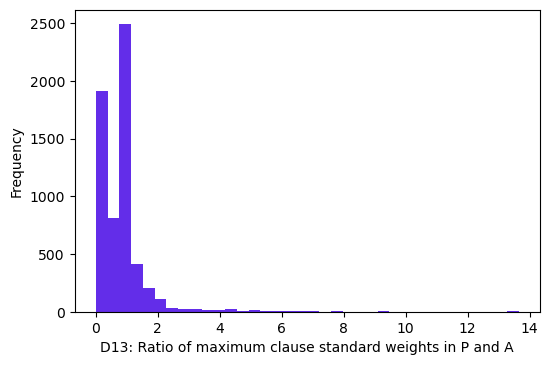

count    6118.000000
mean        0.865538
std         0.474855
min         0.018680
25%         0.571905
50%         0.894770
75%         0.999520
max         7.206200
Name: D14, dtype: float64


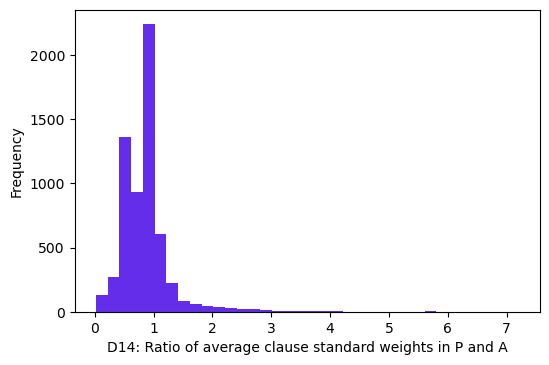

count    6118.000000
mean        2.818116
std        14.843676
min         0.051613
25%         1.000000
50%         1.075000
75%         1.476400
max       449.200000
Name: D15, dtype: float64


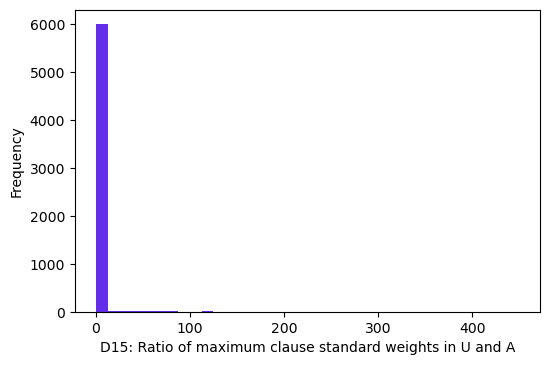

count    6118.000000
mean        1.770084
std         2.438688
min         0.228420
25%         1.136500
50%         1.358350
75%         1.836075
max        78.779000
Name: D16, dtype: float64


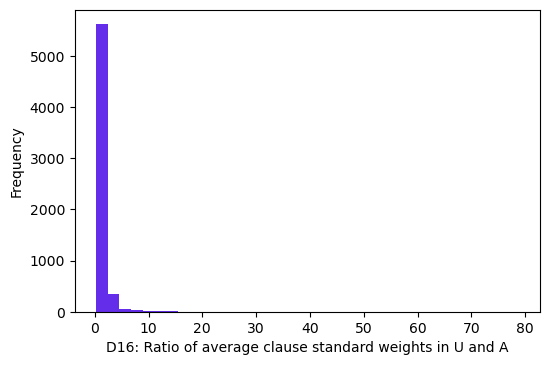

count    6118.000000
mean        0.044860
std         0.102268
min         0.000000
25%         0.000000
50%         0.000000
75%         0.030303
max         0.727270
Name: D17, dtype: float64


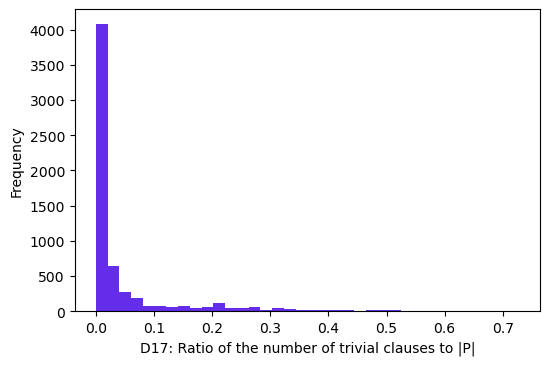

count    6118.000000
mean        0.110039
std         0.160520
min         0.000000
25%         0.000000
50%         0.020202
75%         0.171720
max         0.858590
Name: D18, dtype: float64


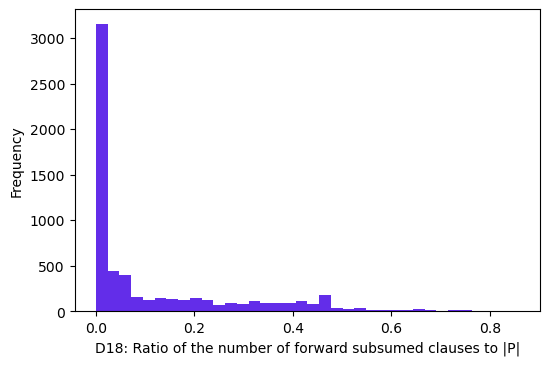

count    6118.00000
mean        0.84510
std         0.20275
min         0.14141
25%         0.73737
50%         0.94949
75%         0.98990
max         1.00000
Name: D19, dtype: float64


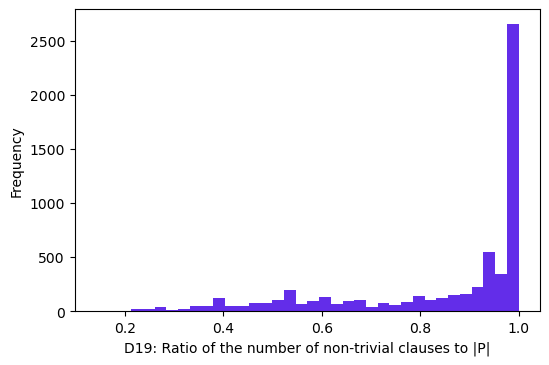

count    6118.000000
mean        0.012384
std         0.140829
min         0.000000
25%         0.000000
50%         0.000000
75%         0.020202
max         7.727300
Name: D20, dtype: float64


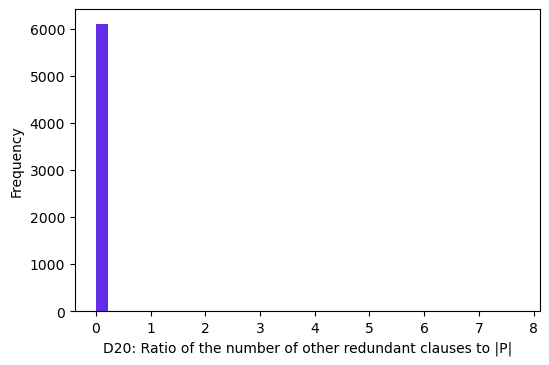

count    6118.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: D21, dtype: float64


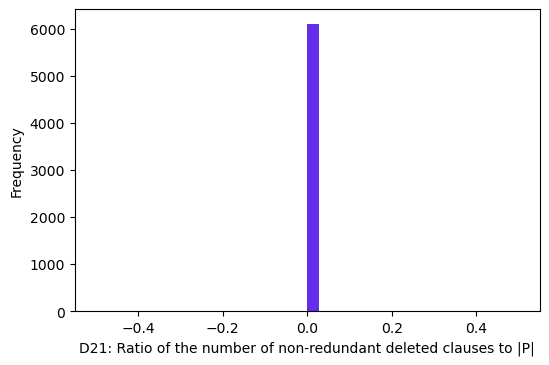

count    6118.000000
mean        0.005344
std         0.022500
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.404040
Name: D22, dtype: float64


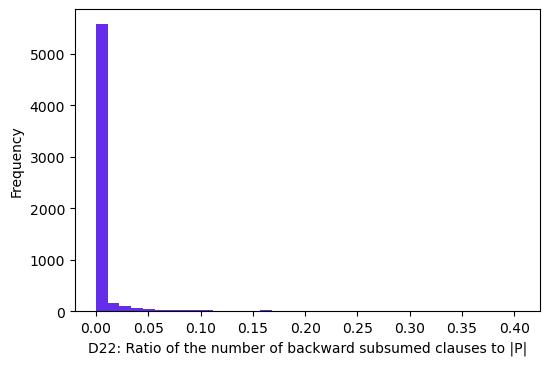

count    6118.000000
mean        0.021260
std         0.050914
min         0.000000
25%         0.000000
50%         0.000000
75%         0.020202
max         0.525250
Name: D23, dtype: float64


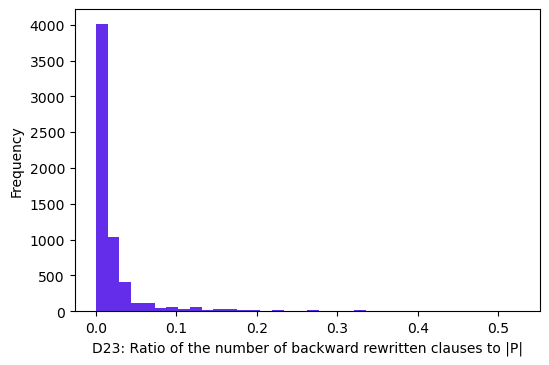

count    6118.000000
mean        0.029045
std         0.118296
min         0.000000
25%         0.000000
50%         0.000000
75%         0.020202
max         5.404000
Name: D24, dtype: float64


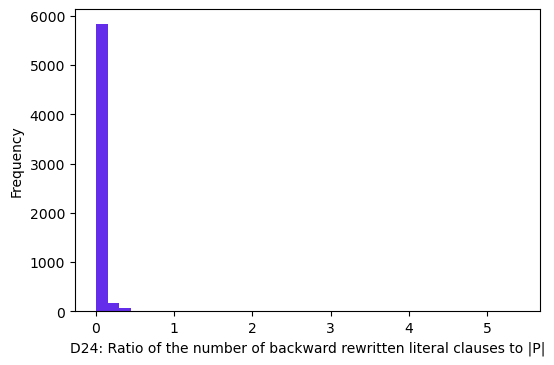

count    6118.000000
mean        4.007573
std         9.546297
min         0.000000
25%         0.484850
50%         1.575800
75%         3.151500
max       142.700000
Name: D25, dtype: float64


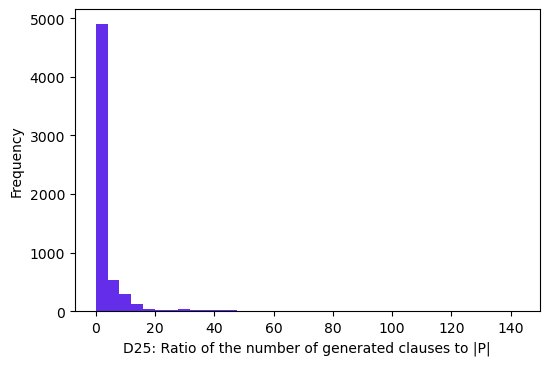

count    6118.000000
mean        7.078326
std        10.954792
min         0.000000
25%         1.202000
50%         4.292900
75%         8.492375
max       176.010000
Name: D26, dtype: float64


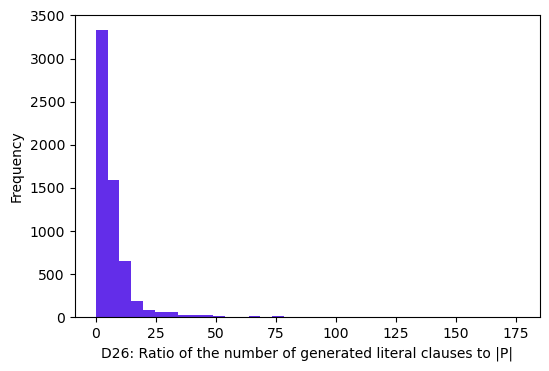

count    6118.000000
mean        3.273145
std         8.773442
min         0.000000
25%         0.404040
50%         1.363600
75%         2.643975
max       142.600000
Name: D27, dtype: float64


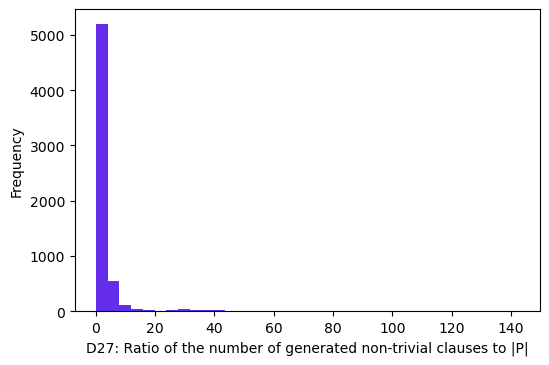

count    6118.000000
mean        0.024949
std         0.090030
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010101
max         2.777800
Name: D28, dtype: float64


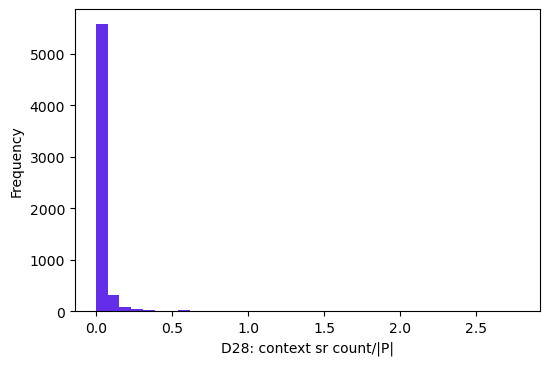

count    6118.000000
mean        3.956744
std         9.533303
min         0.000000
25%         0.444440
50%         1.495000
75%         3.090900
max       142.700000
Name: D29, dtype: float64


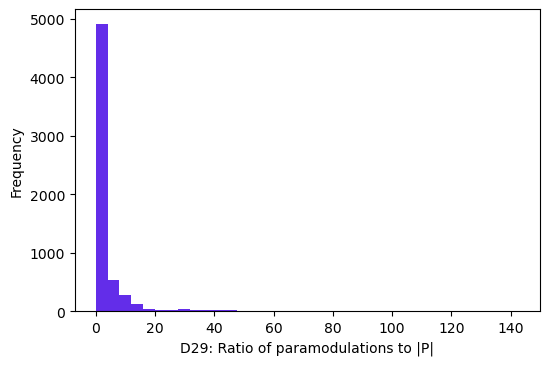

count    6118.000000
mean        0.009847
std         0.060589
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.818200
Name: D30, dtype: float64


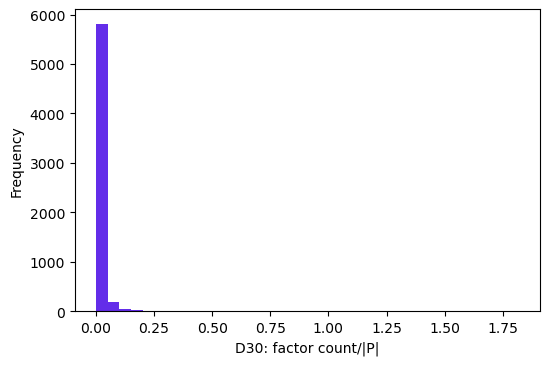

count    6118.000000
mean        0.015670
std         0.145052
min         0.000000
25%         0.000000
50%         0.000000
75%         0.020202
max         7.888900
Name: D31, dtype: float64


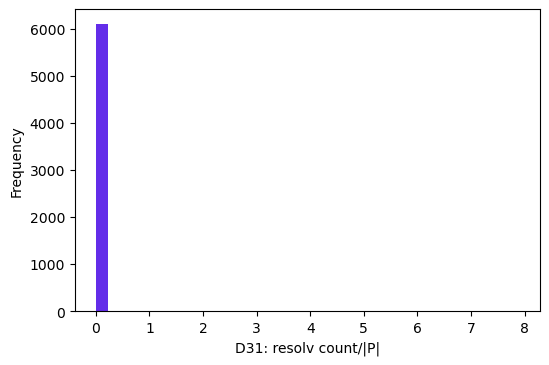

count    6118.000000
mean        0.192655
std         0.333571
min         0.000000
25%         0.000000
50%         0.025641
75%         0.152410
max         1.000000
Name: D32, dtype: float64


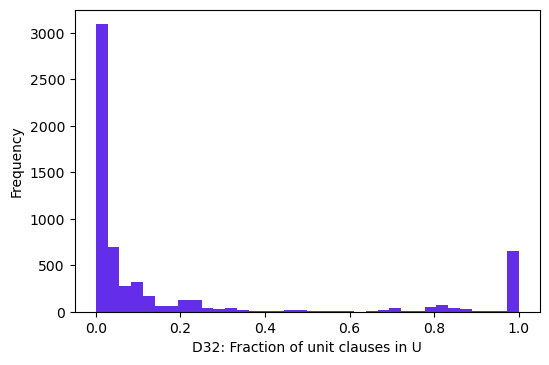

count    6118.000000
mean        0.699686
std         0.297221
min         0.000000
25%         0.546150
50%         0.719010
75%         1.000000
max         1.000000
Name: D33, dtype: float64


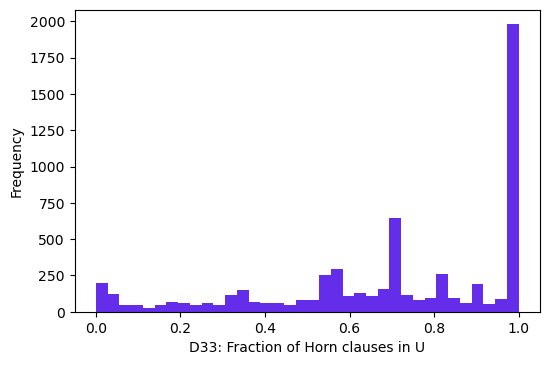

count    6118.000000
mean        0.134589
std         0.250727
min         0.000000
25%         0.000000
50%         0.031084
75%         0.096898
max         1.000000
Name: D34, dtype: float64


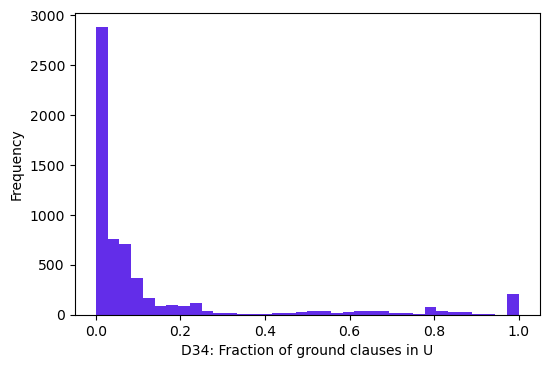

count    6118.000000
mean        0.182576
std         0.328448
min         0.000000
25%         0.000000
50%         0.018868
75%         0.126252
max         1.000000
Name: D35, dtype: float64


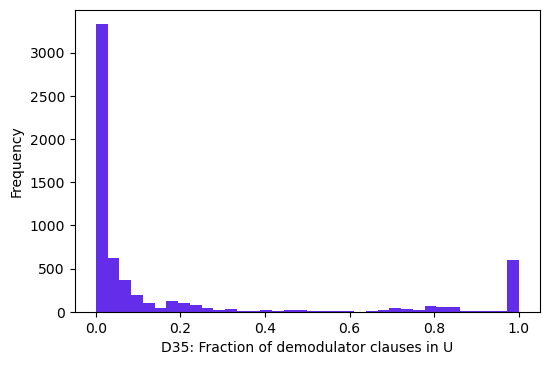

count    6118.000000
mean        0.127697
std         0.261721
min         0.000000
25%         0.000000
50%         0.014286
75%         0.067104
max         1.000000
Name: D36, dtype: float64


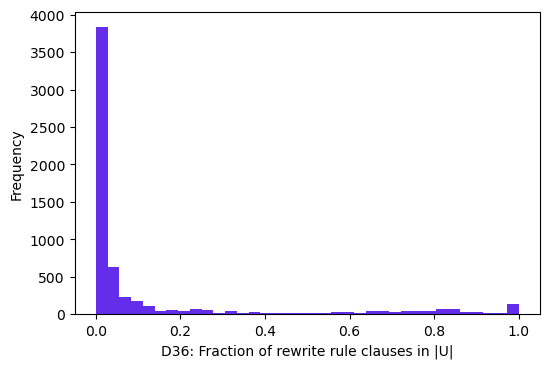

count    6118.000000
mean        0.270410
std         0.321667
min         0.000000
25%         0.046190
50%         0.131235
75%         0.324315
max         1.000000
Name: D37, dtype: float64


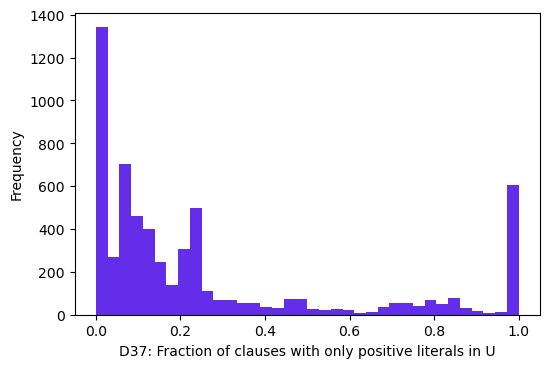

count    6118.000000
mean        0.046002
std         0.100175
min         0.000000
25%         0.000000
50%         0.015873
75%         0.055118
max         1.000000
Name: D38, dtype: float64


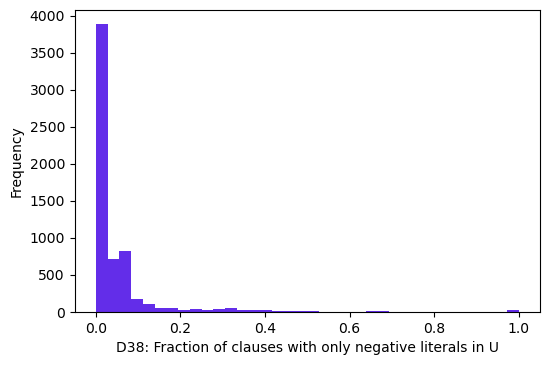

count    6118.000000
mean        0.683588
std         0.320924
min         0.000000
25%         0.569107
50%         0.803685
75%         0.910570
max         1.000000
Name: D39, dtype: float64


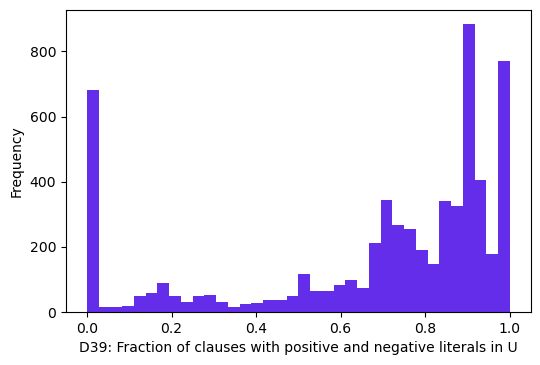

In [6]:
plt.rcParams['axes.facecolor'] = 'white'

for col in df[features.index].columns:
    print(df[col].describe())
    df[col].plot.hist(bins = nbins, color=color)
    xlab1 = col
    xlab2 = features.loc[col, 'Description']
    xlab = xlab1 + ': ' + xlab2
    plt.xlabel(xlab)
    plt.show()


### Distribution of Best Heuristic

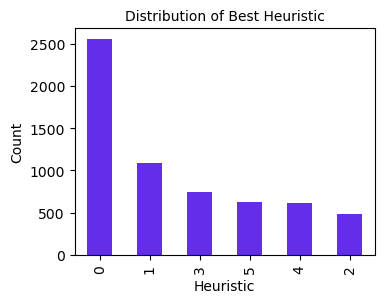

In [7]:
plt.figure(figsize=(4,3))
plt.gcf().subplots_adjust(left=0.15)
plt.rcParams['axes.facecolor'] = 'white'

pd.value_counts(df2['Best Heuristic']).plot.bar(color=color) 
plt.title('Distribution of Best Heuristic')
plt.ylabel('Count')
plt.xlabel('Heuristic')
plt.savefig('../figures/heuristic_distribution.png', dpi = 300, format='png')
plt.show()

count    6118.000000
mean        0.367852
std         0.313888
min         0.000000
25%         0.114573
50%         0.235290
75%         0.593355
max         1.000000
Name: S1, dtype: float64


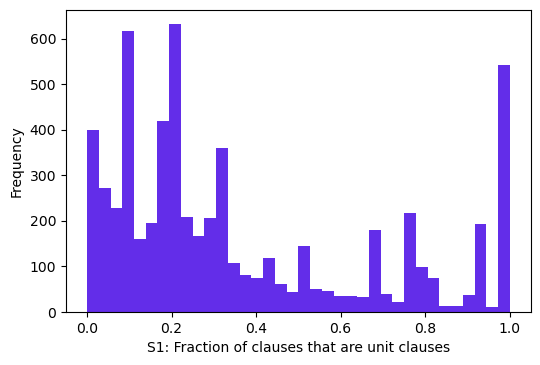

count    6118.000000
mean        0.264259
std         0.268266
min         0.000000
25%         0.101690
50%         0.136840
75%         0.333330
max         1.000000
Name: S3, dtype: float64


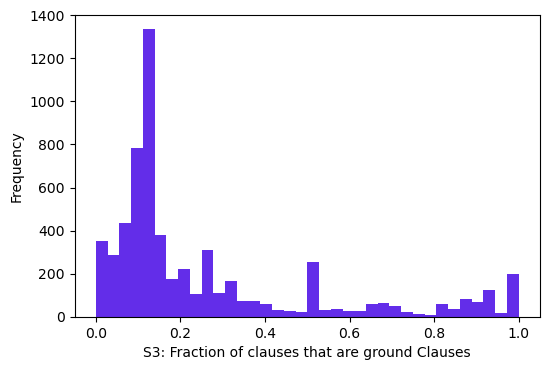

count    6118.000000
mean        0.300741
std         0.263988
min         0.000000
25%         0.100000
50%         0.200000
75%         0.483870
max         1.000000
Name: S4, dtype: float64


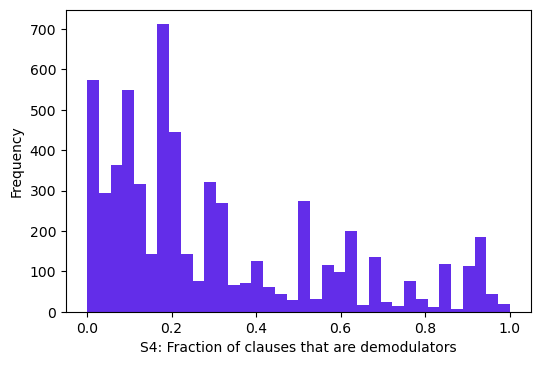

count    6118.000000
mean        0.357758
std         0.269641
min         0.000382
25%         0.144055
50%         0.250895
75%         0.500000
max         1.000000
Name: S6, dtype: float64


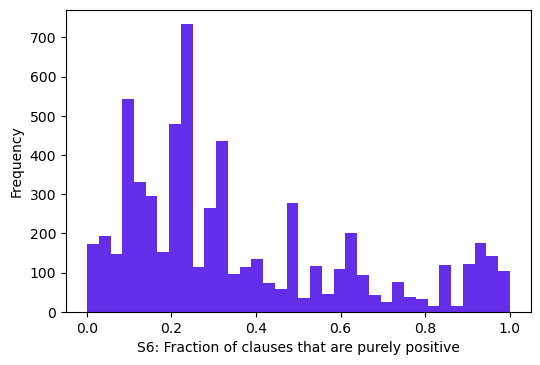

count    6118.000000
mean        0.536053
std         0.302384
min         0.000000
25%         0.250000
50%         0.645390
75%         0.766420
max         0.996600
Name: S8, dtype: float64


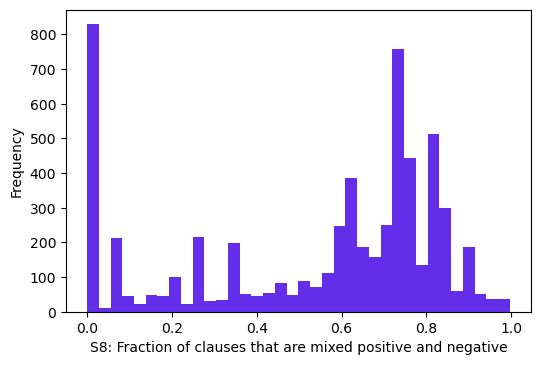

count    6118.000000
mean        7.725727
std         7.396474
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        86.000000
Name: S11, dtype: float64


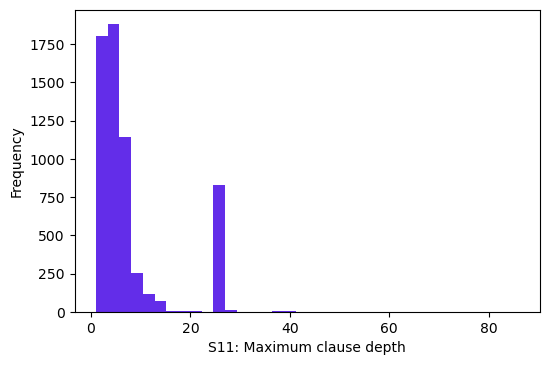

count    6118.000000
mean        2.755282
std         0.938847
min         1.000000
25%         2.113700
50%         2.320500
75%         3.682100
max        11.000000
Name: S12, dtype: float64


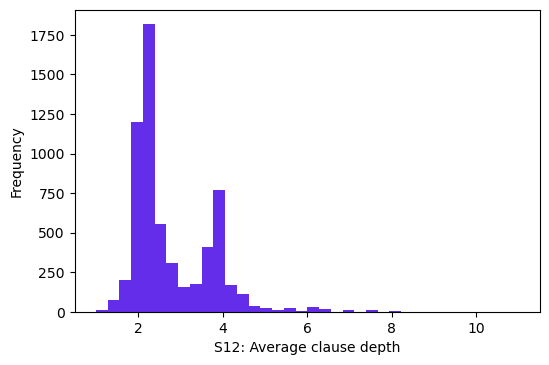

count    6118.000000
mean        0.322387
std         0.178269
min         0.003150
25%         0.184598
50%         0.363300
75%         0.433180
max         0.979170
Name: D3, dtype: float64


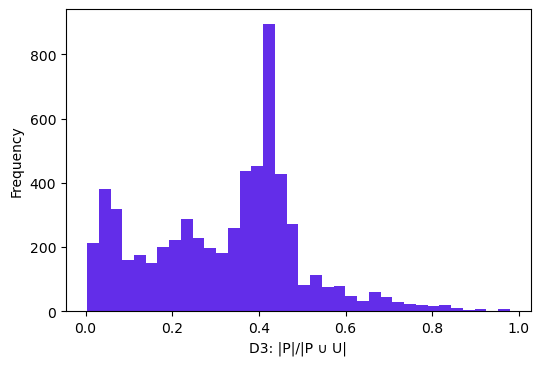

count    6118.000000
mean        0.683588
std         0.320924
min         0.000000
25%         0.569107
50%         0.803685
75%         0.910570
max         1.000000
Name: D39, dtype: float64


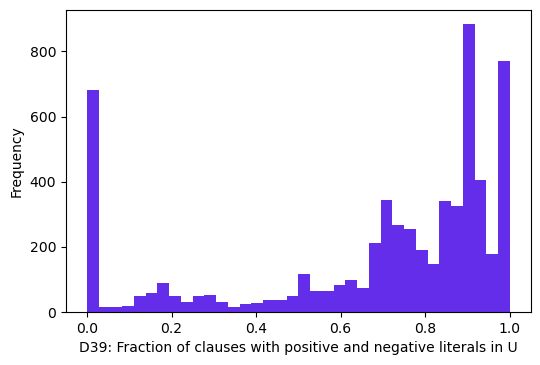

In [8]:
fraclike = ['S1','S3', 'S4', 'S6', 'S8','S11', 'S12', 'D3', 'D39']
for col in df[fraclike].columns:
    print(df[col].describe())
    df[col].plot.hist(bins = nbins, color=color)
    xlab1 = col
    xlab2 = features.loc[col,'Description']
    xlab = xlab1 + ': ' + xlab2
    plt.xlabel(xlab)
    plt.show()

In [9]:
def convert(inputnum):
    if abs(inputnum) < 1:
        return np.round(inputnum, decimals=2)
    else:
        return np.round(inputnum)

static_colnames = ['S' + str(i) for i in range(1,15)]
dynamic_colnames = ['D' + str(i) for i in range(1,40)]
static_colnames.remove('S5')
dynamic_colnames.remove('D21')
allcols_revised = static_colnames + dynamic_colnames

maxmin = []
for col in allcols_revised:
    maxmin.append([convert(df[col].min()), convert(df[col].max())])
    
def tell_type(maxmin):
    col_types = {}
    for i, feat in enumerate(allcols_revised):
        if maxmin[i][1] < 10:
            col_types[feat] = 'fractionlike'
        elif maxmin[i][1] >= 10:
            col_types[feat] = 'lengthlike'
    return col_types

coltypes = tell_type(maxmin)

### Heatmaps
* To plot every combination of features together would be over 1200 plots, which seemed overwhelming
* I excluded S5 and D21 because they are both single valued columns, i.e. every value is the same in those columns
* I broke them down into a few groups:
    * Static vs. Static 
    * Dynamic vs. Static
    * Dynamic vs. Dynamic

#### Static vs. Static

In [10]:
col1, col2 = 'S13', 'S4'
q = 0.99
df_col_one = df[df[col1] <= df[col1].quantile(q)].loc[:,[col1,col2]]
df_col_one.describe()

S13           S4
count  6086.000000  6086.000000
mean    150.876602     0.302095
std     217.680435     0.263916
min      12.000000     0.000000
25%      36.000000     0.103068
50%      61.000000     0.200000
75%     117.000000     0.490523
max     678.000000     1.000000

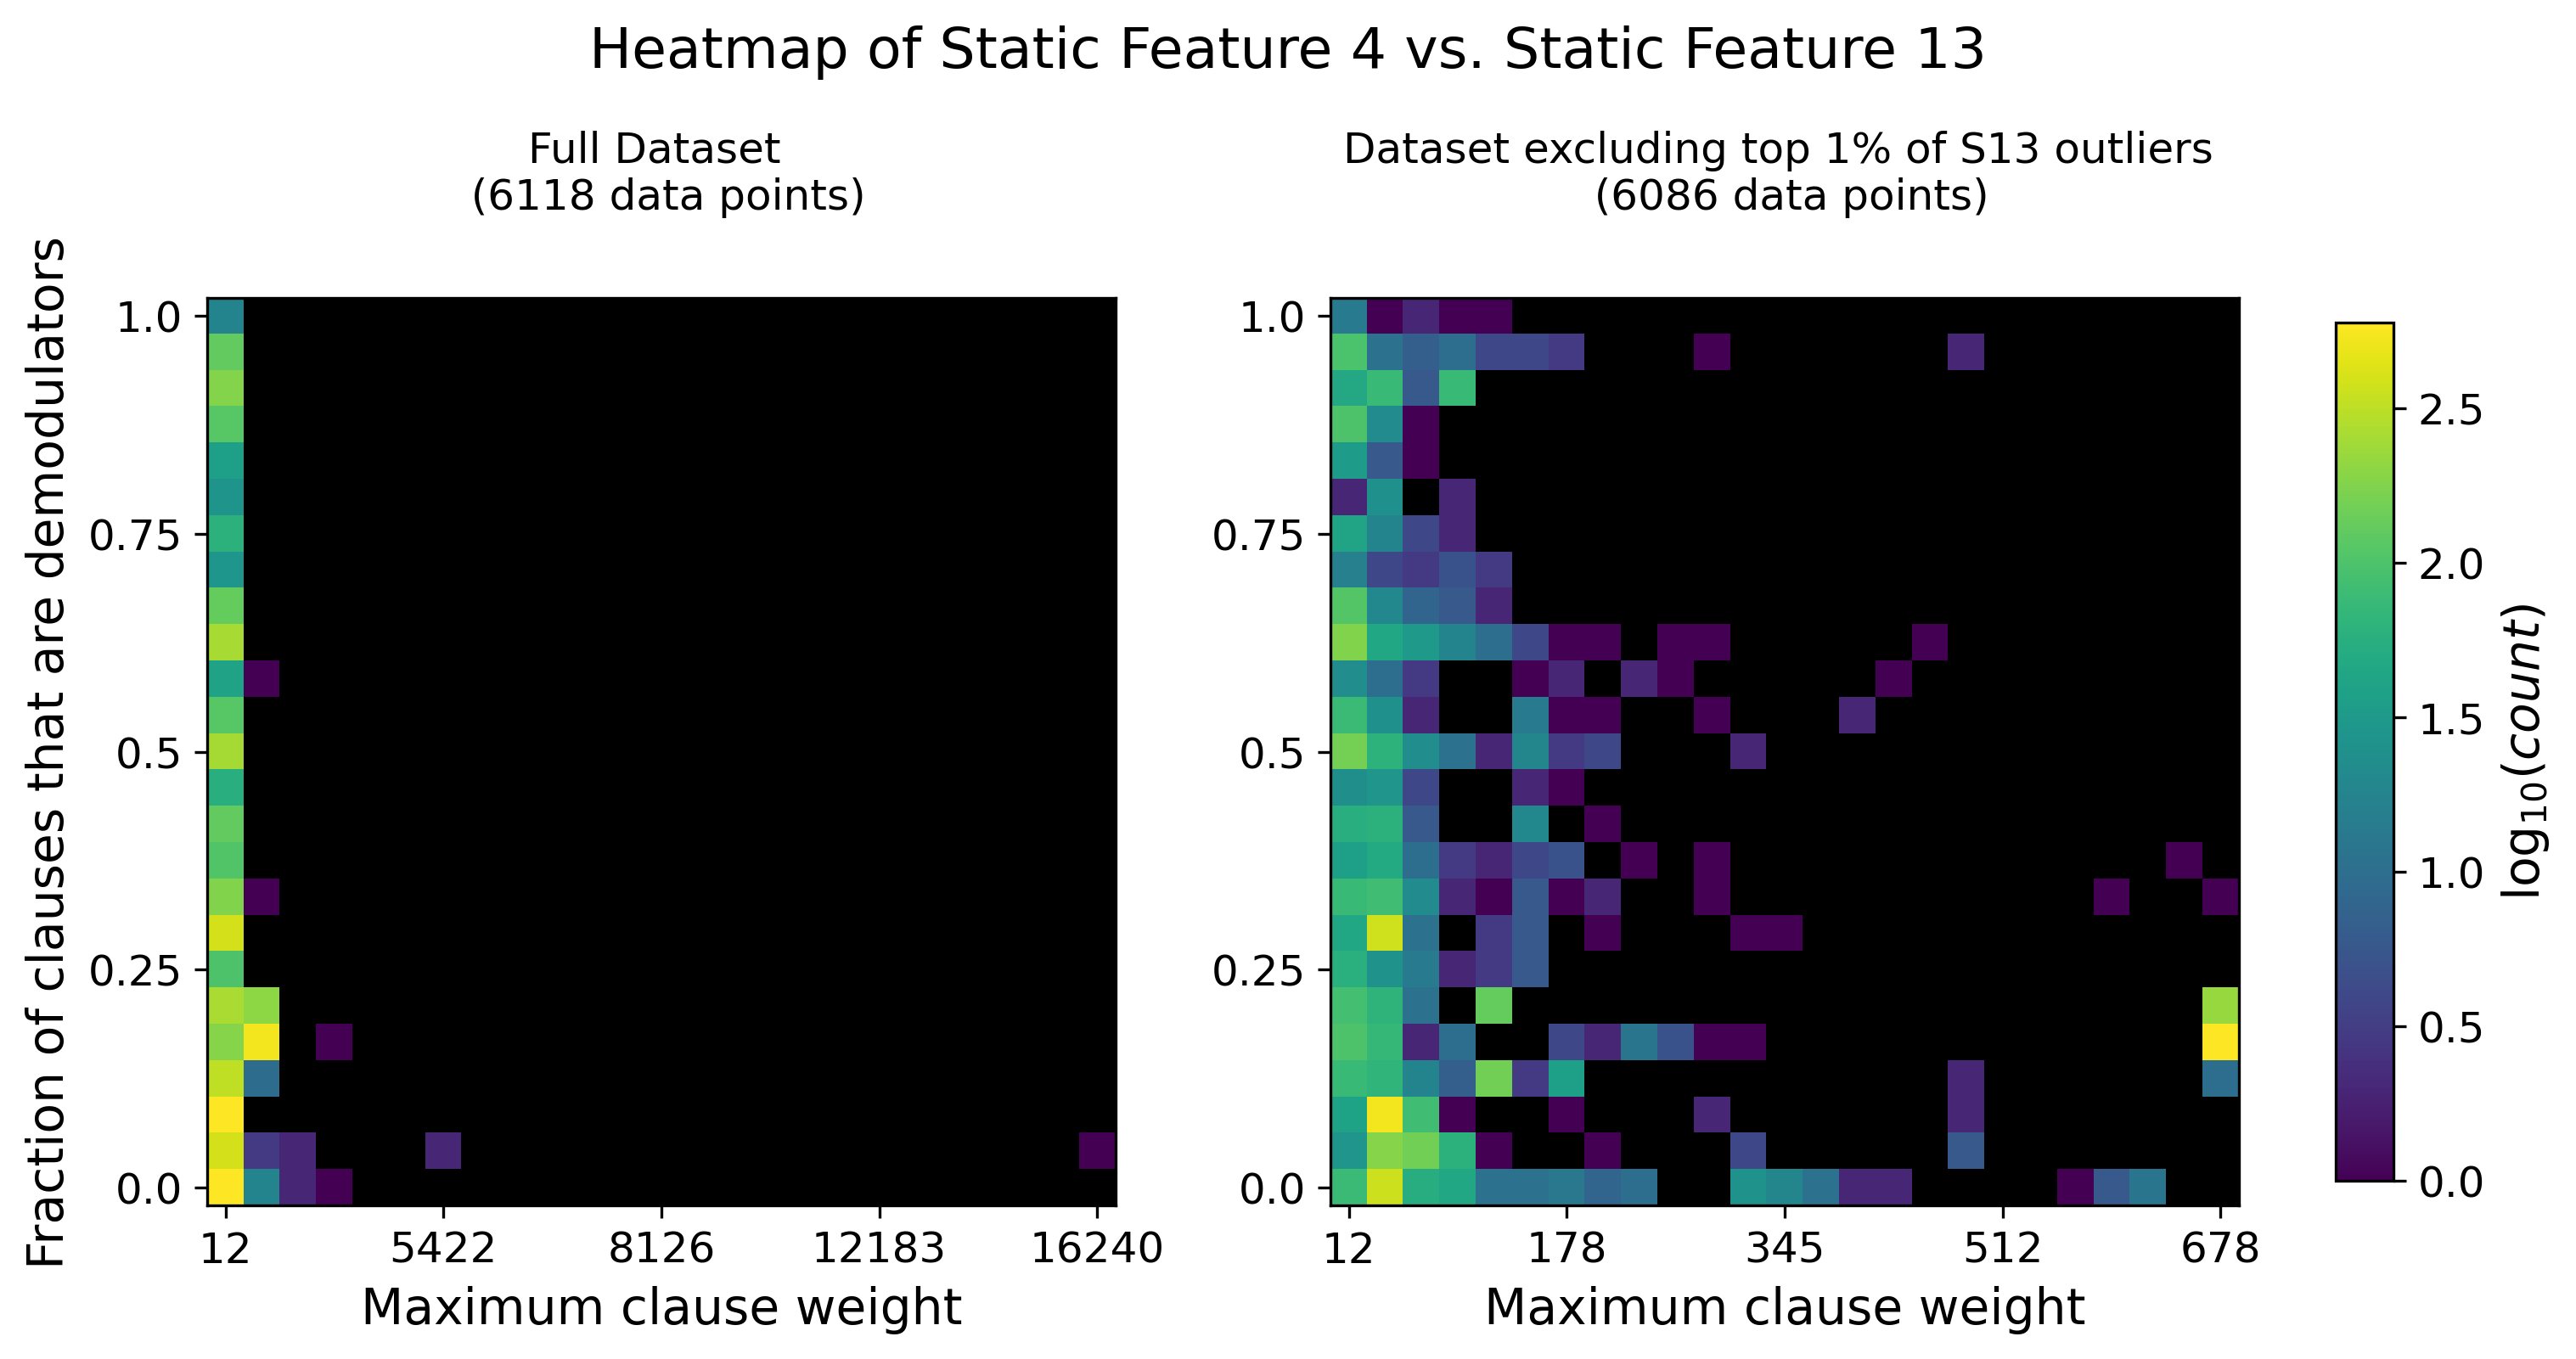

In [11]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE, dpi=300)  # fontsize of the figure title

cmap = plt.cm.viridis
cmap_name = 'viridis'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.titlepad'] = 25
S13_ticks_orig = [12, 5422, 8126, 12183, 16240]
S13_ticks_reduced = [12, 178, 345, 512, 678]
S4_ticks = [0.0, 0.25, 0.50, 0.75, 1.0]
ss_plots_to_save =[['S13', 'S4']]
nbins = 25
for col1, col2 in ss_plots_to_save:
    q = 0.99
    fig = plt.figure(constrained_layout=True,figsize=(10,5)) # 
    spec = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)
    fig_ax1 = fig.add_subplot(spec[0, 0])
    fig_ax2 = fig.add_subplot(spec[0, 1])
    df_col_one = df[df[col1] <= df[col1].quantile(q)].loc[:,[col1,col2]]
    shape0 = df.loc[:,[col1,col2]].shape[0]
    shape1 = df_col_one.shape[0]
    heatmap, xedges, yedges = np.histogram2d(df[col1], df[col2], bins=nbins)
    heatmap_one, xedges_one, yedges_one = np.histogram2d(df_col_one[col1], df_col_one[col2], bins=nbins)
    with np.errstate(divide='ignore'):
        heatmap = np.log10(heatmap)
        heatmap_one = np.log10(heatmap_one)
    col1_type = coltypes[col1]
    col2_type = coltypes[col2]
    for i in [0, 1]:
        if i == 0:
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
            im = fig_ax1.imshow(heatmap.T, origin='lower', cmap=cmap)
            plt.sca(fig_ax1)
            plt.yticks(np.arange(nbins)[::6], S4_ticks)  
            plt.xticks(np.arange(nbins)[::6], S13_ticks_orig)
            fig_ax1.set(title='Full Dataset \n ({} data points)'.format(shape0))
            plt.xlabel(features.loc[col1,'Description'])
            plt.ylabel(features.loc[col2,'Description'], x=-0.5)           
        elif i == 1:
            extent = [xedges_one[0], xedges_one[-1], yedges_one[0], yedges_one[-1]]
            im = fig_ax2.imshow(heatmap_one.T, origin='lower', cmap=cmap)
            plt.sca(fig_ax2)
            plt.yticks(np.arange(nbins)[::6], S4_ticks)  
            fig_ax2.yaxis.tick_left()
            plt.xticks(np.arange(nbins)[::6], S13_ticks_reduced)
            fig_ax2.set(title='Dataset excluding top 1% of S13 outliers \n ({} data points)'.format(shape1))
            plt.colorbar(im, label='$\log_{10}(count)$',fraction=0.055, panchor=(1.05, 0.5), aspect=30,  shrink=0.675, pad=0.05) #, location='right') #,  ax=[fig_ax2])
            plt.xlabel(features.loc[col1,'Description'])
    plt.suptitle('Heatmap of Static Feature 4 vs. Static Feature 13',y=1.07)
    figname = '../figures/heatmap3_{}_{}.png'.format(col2,col1)
    plt.savefig(figname, dpi=300, format='png',  bbox_inches='tight')
    plt.show()

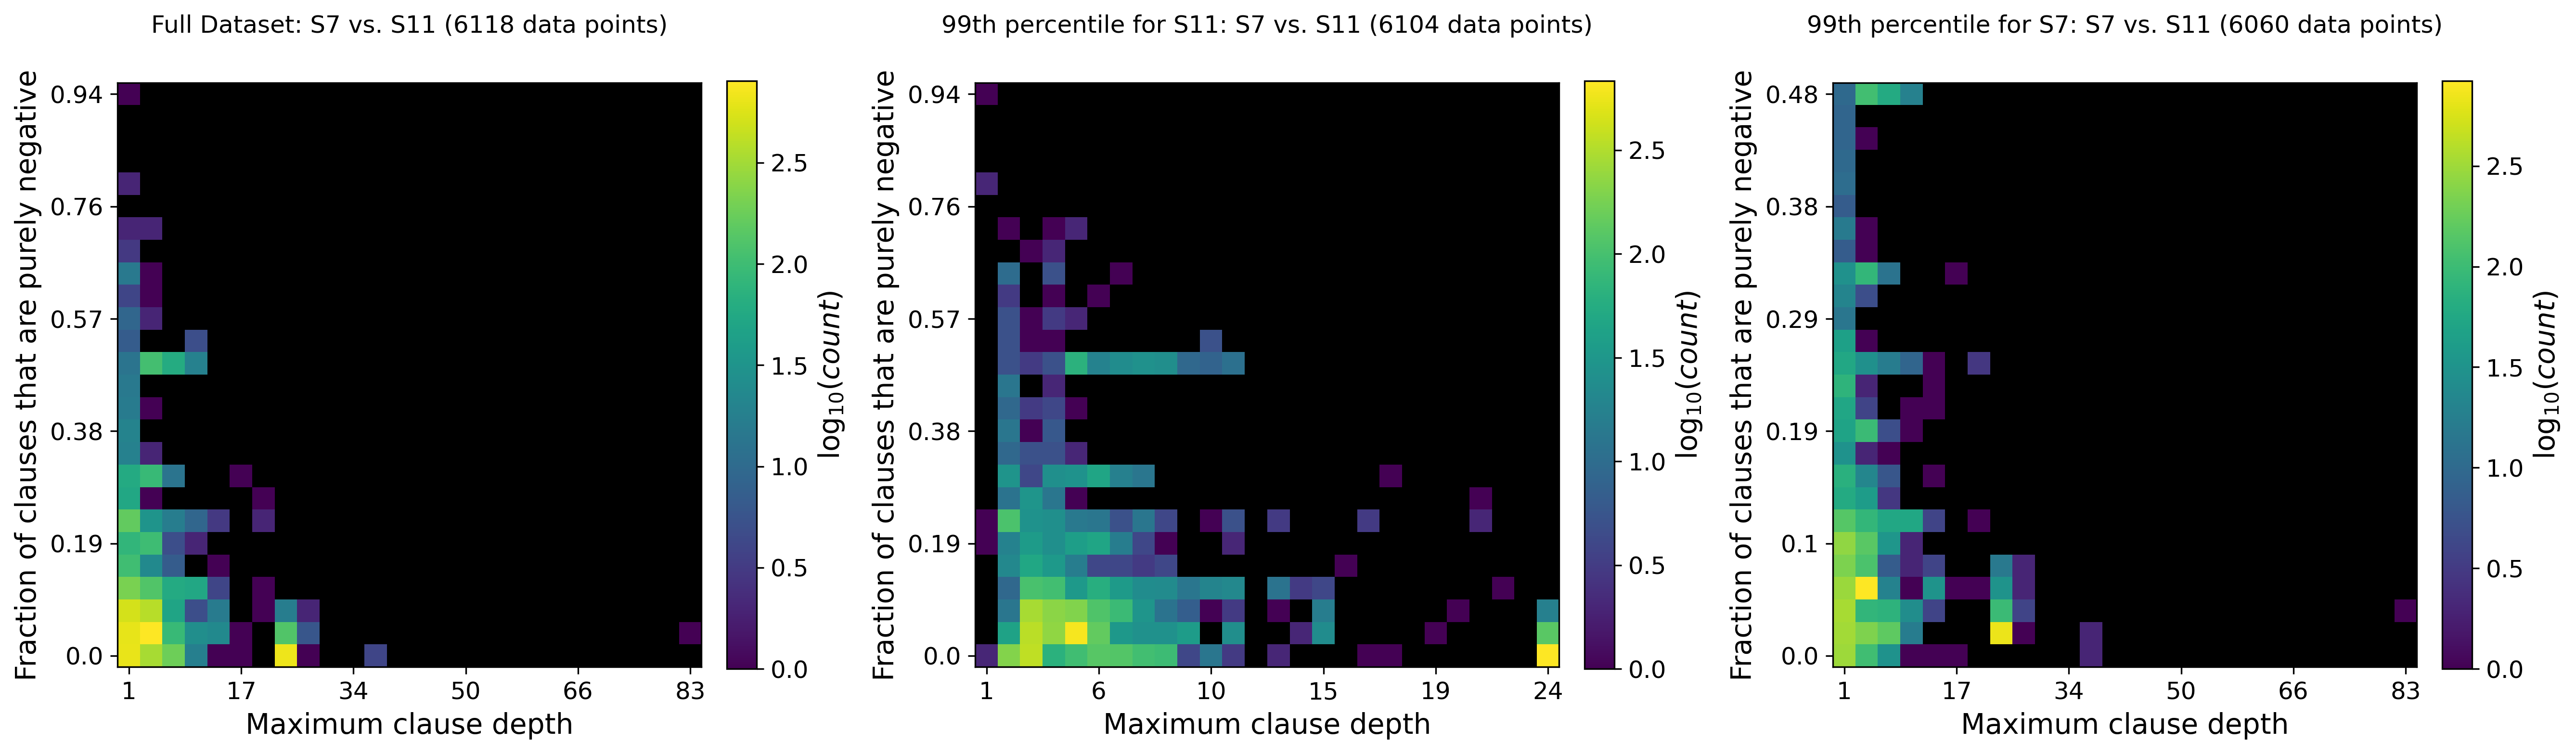

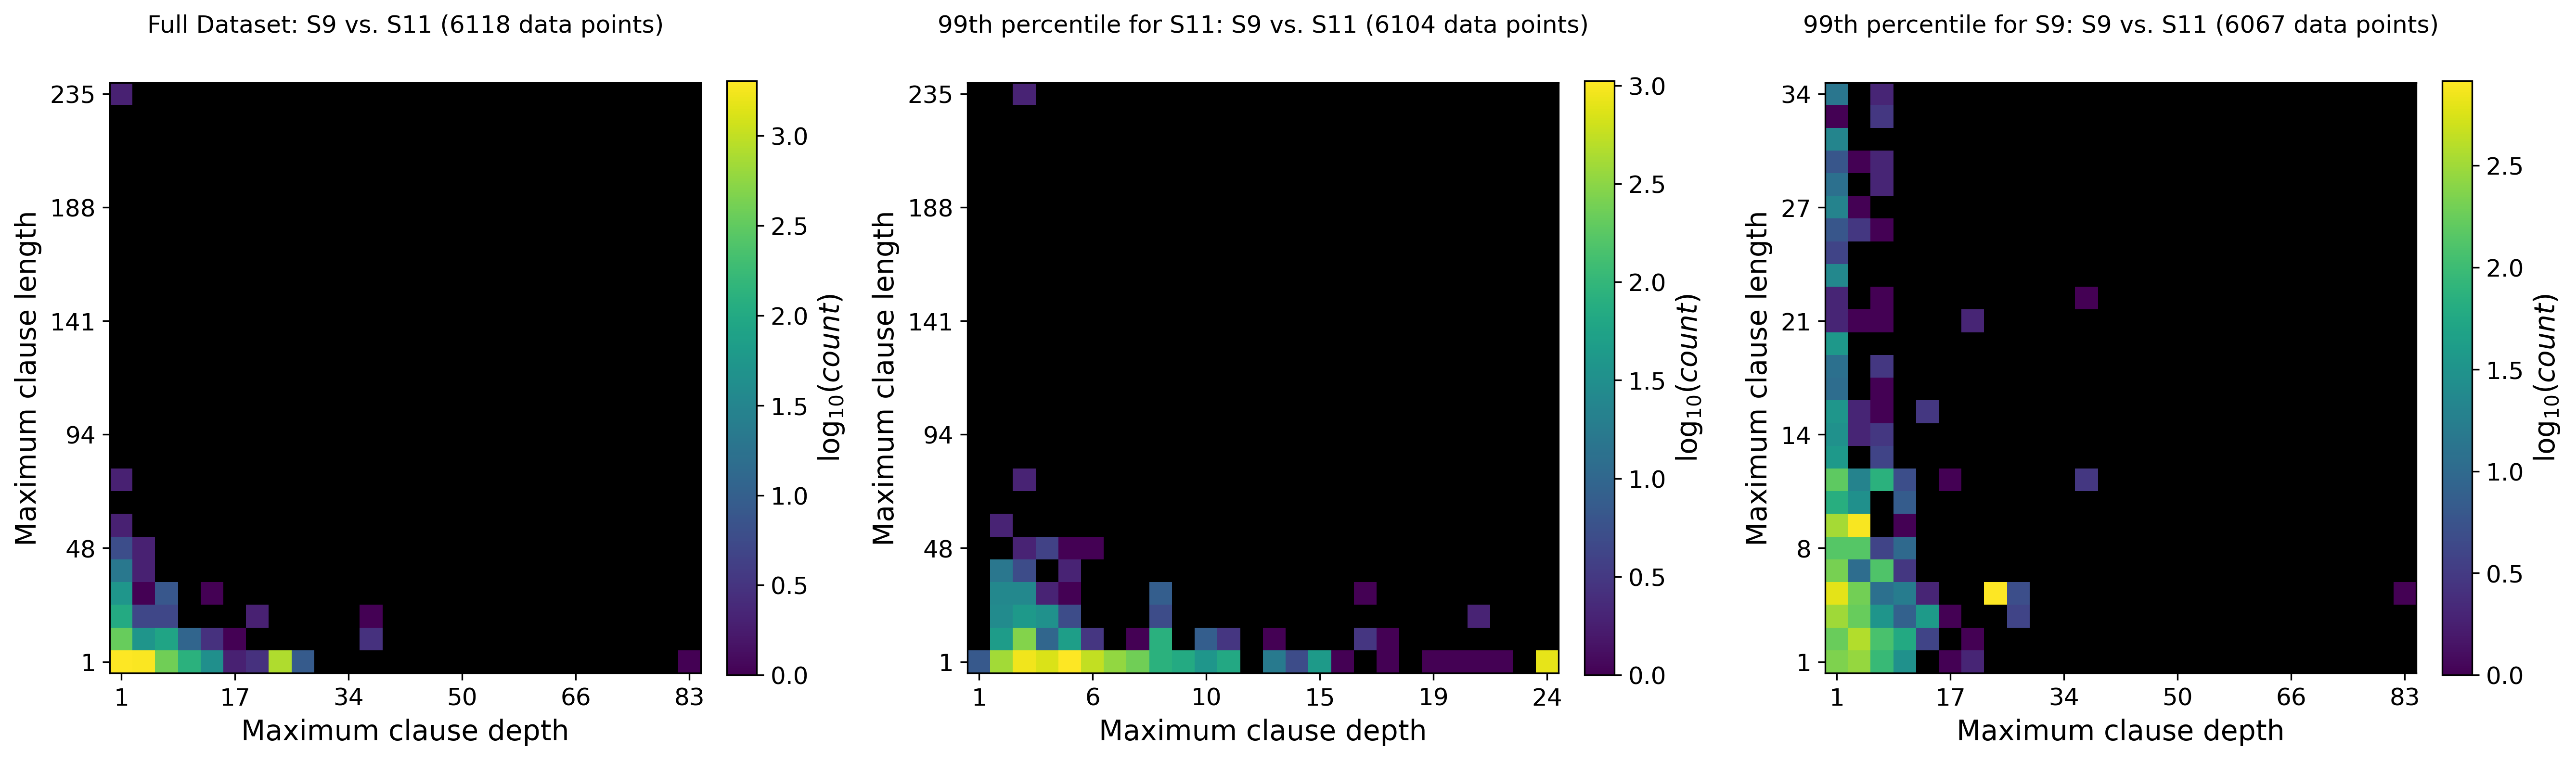

In [12]:
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.titlepad'] = 25
ss_plots_to_save =[['S11', 'S7'], ['S11', 'S9']]
nbins=26
for col1, col2 in ss_plots_to_save:
    q = 0.99
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
    df_col_one = df[df[col1] <= df[col1].quantile(q)].loc[:,[col1,col2]]
    df_col_two = df[df[col2] <= df[col2].quantile(q)].loc[:,[col1,col2]]
    shape0 = df.loc[:,[col1,col2]].shape[0]
    shape1 = df_col_one.shape[0]
    shape2 = df_col_two.shape[0]
    heatmap, xedges, yedges = np.histogram2d(df[col1], df[col2], bins=nbins)
    heatmap_one, xedges_one, yedges_one = np.histogram2d(df_col_one[col1], df_col_one[col2], bins=nbins)
    heatmap_two, xedges_two, yedges_two = np.histogram2d(df_col_two[col1], df_col_two[col2], bins=nbins)
    with np.errstate(divide='ignore'):
        heatmap = np.log10(heatmap)
        heatmap_one = np.log10(heatmap_one)
        heatmap_two = np.log10(heatmap_two)   
    col1_type = coltypes[col1]
    col2_type = coltypes[col2]
    for i,ax in enumerate(axes.flatten()):
        if i == 0:
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
            im = ax.imshow(heatmap.T, origin='lower', cmap=cmap)
            plt.sca(ax)
            if col1_type == 'fractionlike':
                plt.xticks(np.arange(nbins)[::5], np.round(xedges[::5], decimals=2))
            elif col1_type == 'lengthlike':
                plt.xticks(np.arange(nbins)[::5],np.round(xedges[::5]).astype(int))
            if col2_type == 'fractionlike':
                plt.yticks(np.arange(nbins)[::5], np.round(yedges[::5], decimals=2))  
            elif col2_type == 'lengthlike':
                plt.yticks(np.arange(nbins)[::5],np.round(yedges[::5]).astype(int))
            plt.colorbar(im, label='$\log_{10}(count)$',fraction=0.046, pad=0.04)
            ax.set(title='Full Dataset: {} vs. {} ({} data points)'.format(col2,col1,shape0))
            plt.xlabel(features.loc[col1,'Description'])
            plt.ylabel(features.loc[col2,'Description'])           
        elif i == 1:
            extent = [xedges_one[0], xedges_one[-1], yedges_one[0], yedges_one[-1]]
            im = ax.imshow(heatmap_one.T, origin='lower', cmap=cmap)
            plt.sca(ax)
            plt.rcParams['axes.facecolor'] = 'black'
            if col1_type == 'fractionlike':
                plt.xticks(np.arange(nbins)[::5], np.round(xedges_one[::5], decimals=2))
            elif col1_type == 'lengthlike':
                plt.xticks(np.arange(nbins)[::5],np.round(xedges_one[::5]).astype(int))
            if col2_type == 'fractionlike':
                plt.yticks(np.arange(nbins)[::5], np.round(yedges_one[::5], decimals=2))  
            elif col2_type == 'lengthlike':
                plt.yticks(np.arange(nbins)[::5],np.round(yedges_one[::5]).astype(int))
            ax.set(title='{}th percentile for {}: {} vs. {} ({} data points)'.format(int(100*q),col1,col2,col1,shape1))
            plt.colorbar(im, label='$\log_{10}(count)$',fraction=0.046, pad=0.04)
            plt.xlabel(features.loc[col1,'Description'])
            plt.ylabel(features.loc[col2,'Description'])
        elif i == 2:
            extent = [xedges_two[0], xedges_two[-1], yedges_two[0], yedges_two[-1]]
            im = ax.imshow(heatmap_two.T, origin='lower', cmap=cmap)
            plt.sca(ax)
            plt.rcParams['axes.facecolor'] = 'black'
            if col1_type == 'fractionlike':
                plt.xticks(np.arange(nbins)[::5], np.round(xedges_two[::5], decimals=2))
            elif col1_type == 'lengthlike':
                plt.xticks(np.arange(nbins)[::5],np.round(xedges_two[::5]).astype(int))
            if col2_type == 'fractionlike':
                plt.yticks(np.arange(nbins)[::5], np.round(yedges_two[::5], decimals=2))  
            elif col2_type == 'lengthlike':
                plt.yticks(np.arange(nbins)[::5],np.round(yedges_two[::5]).astype(int))
            ax.set(title='{}th percentile for {}: {} vs. {} ({} data points)'.format(int(100*q),col2,col2,col1,shape2))
            plt.colorbar(im, label='$\log_{10}(count)$',fraction=0.046, pad=0.04)
            plt.xlabel(features.loc[col1,'Description'])
            plt.ylabel(features.loc[col2,'Description'])
    plt.tight_layout()
    plt.subplots_adjust(top=1.05)
    figname = '../figures/heatmap3_{}_{}.png'.format(col2,col1)
    plt.savefig(figname, dpi=300, format='png')
    plt.show()

#### Dynamic vs. Static

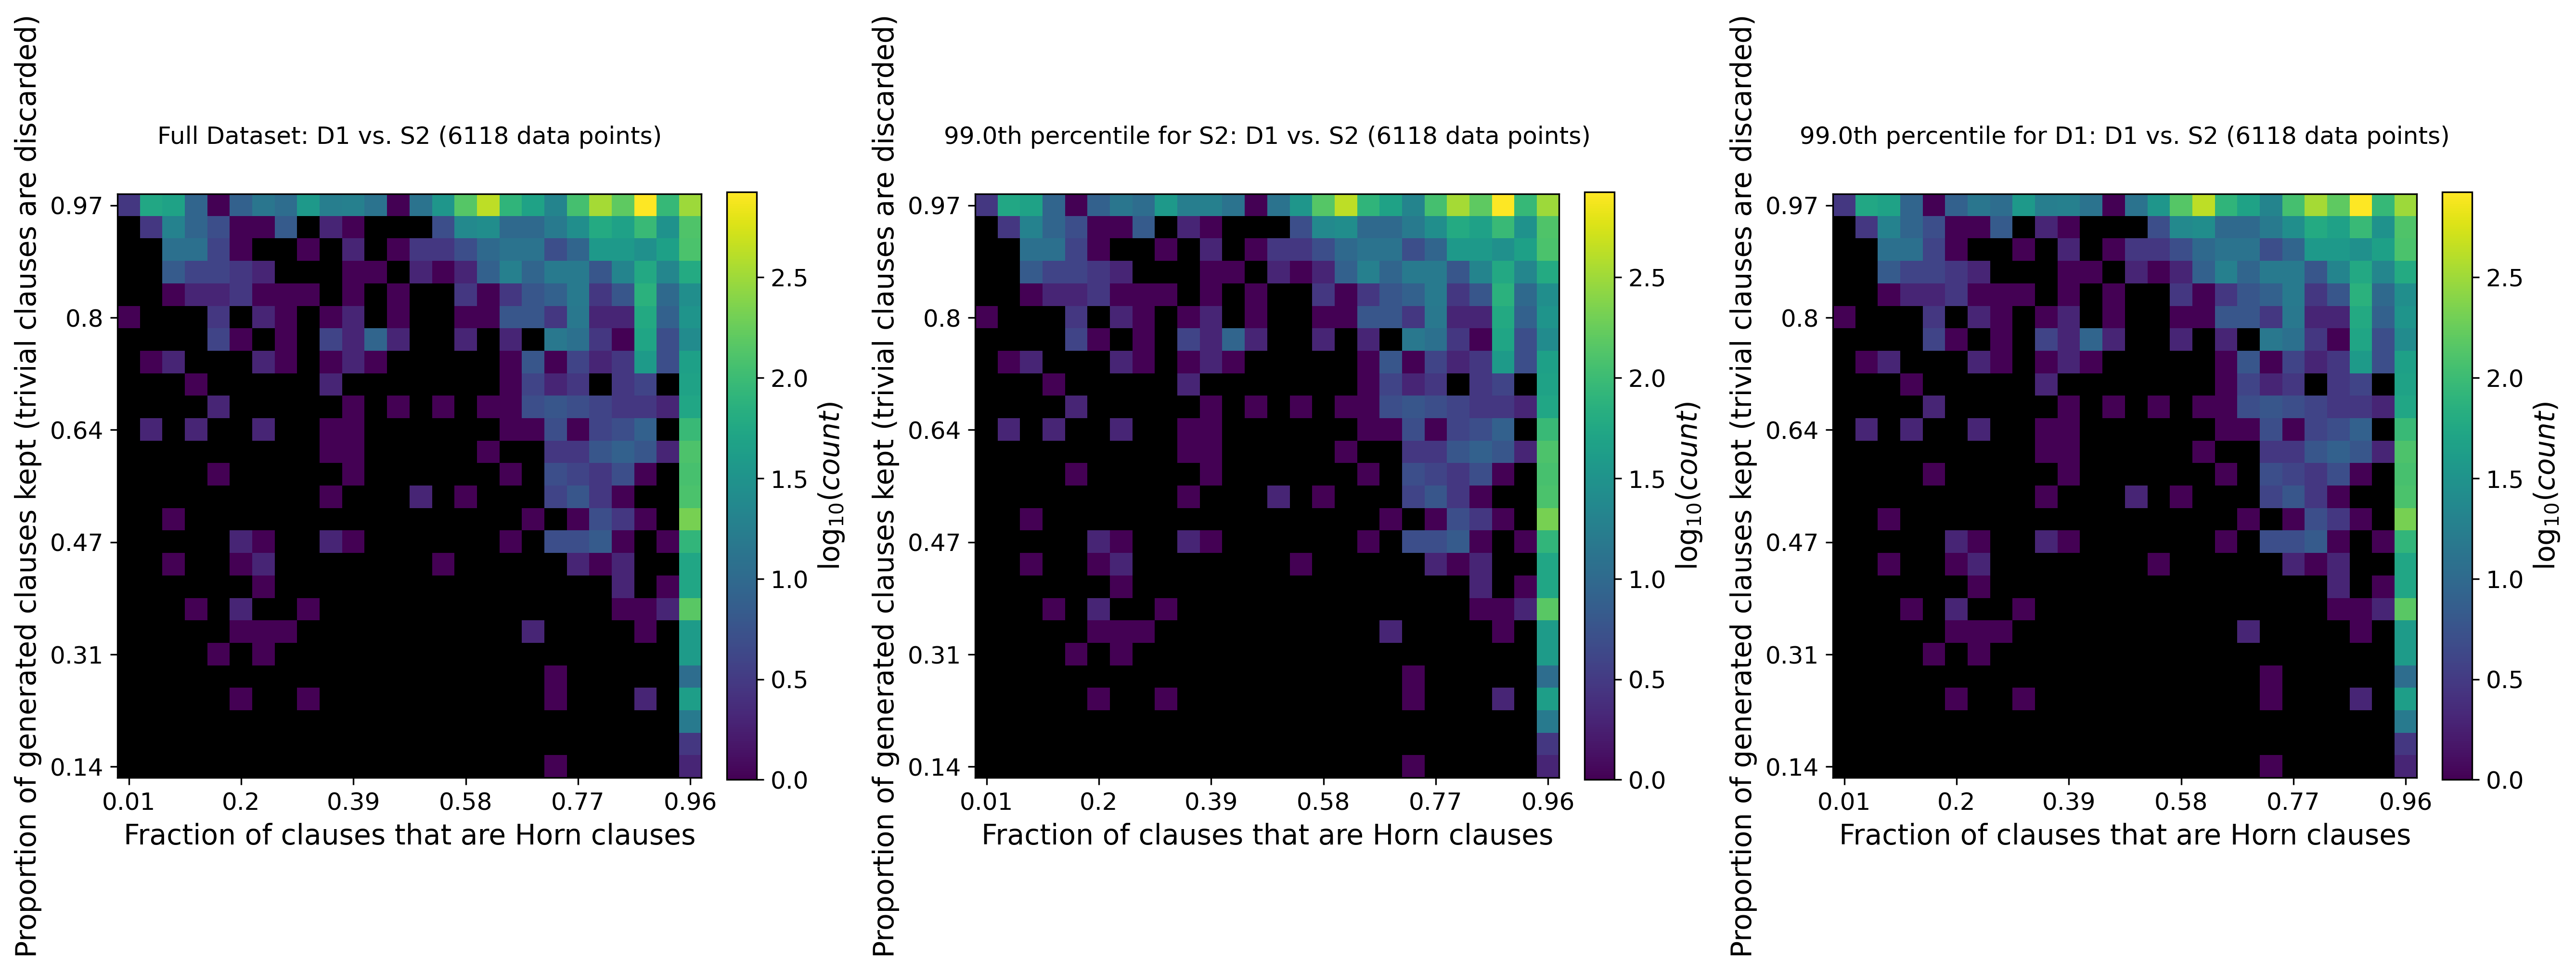

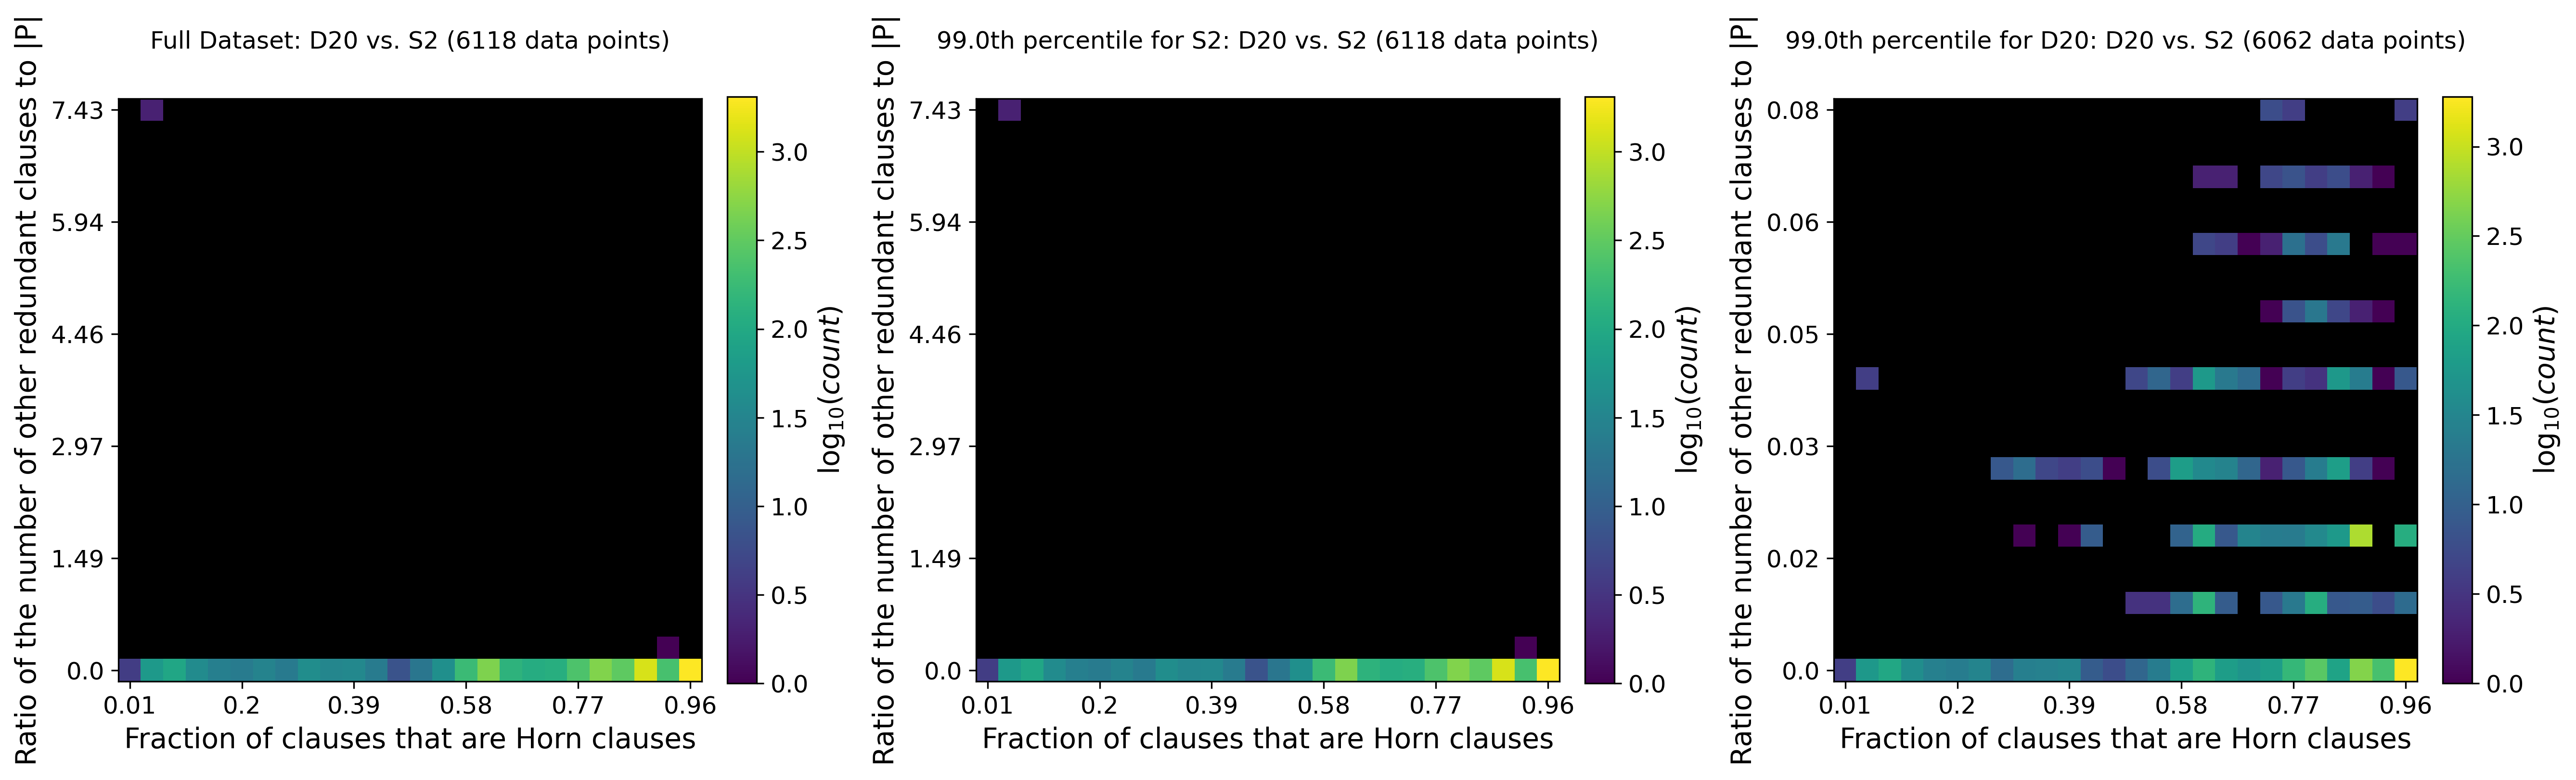

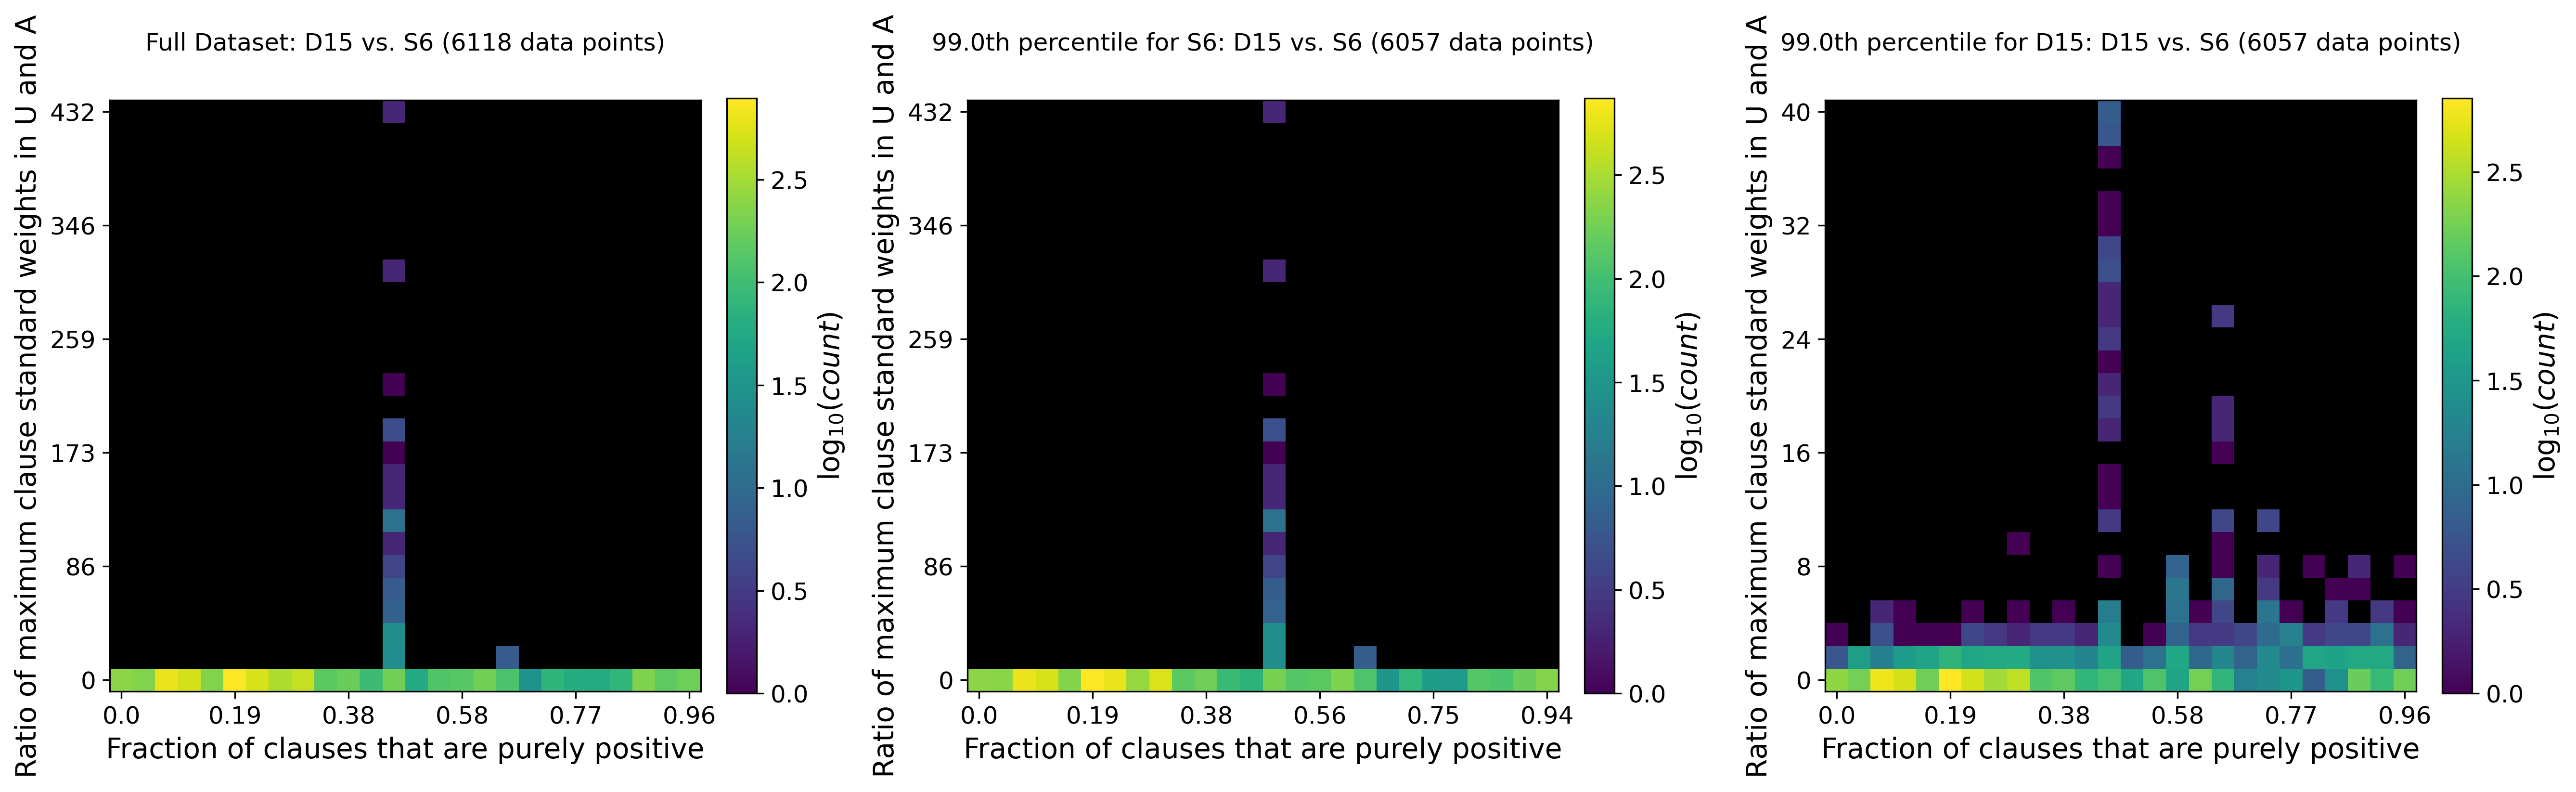

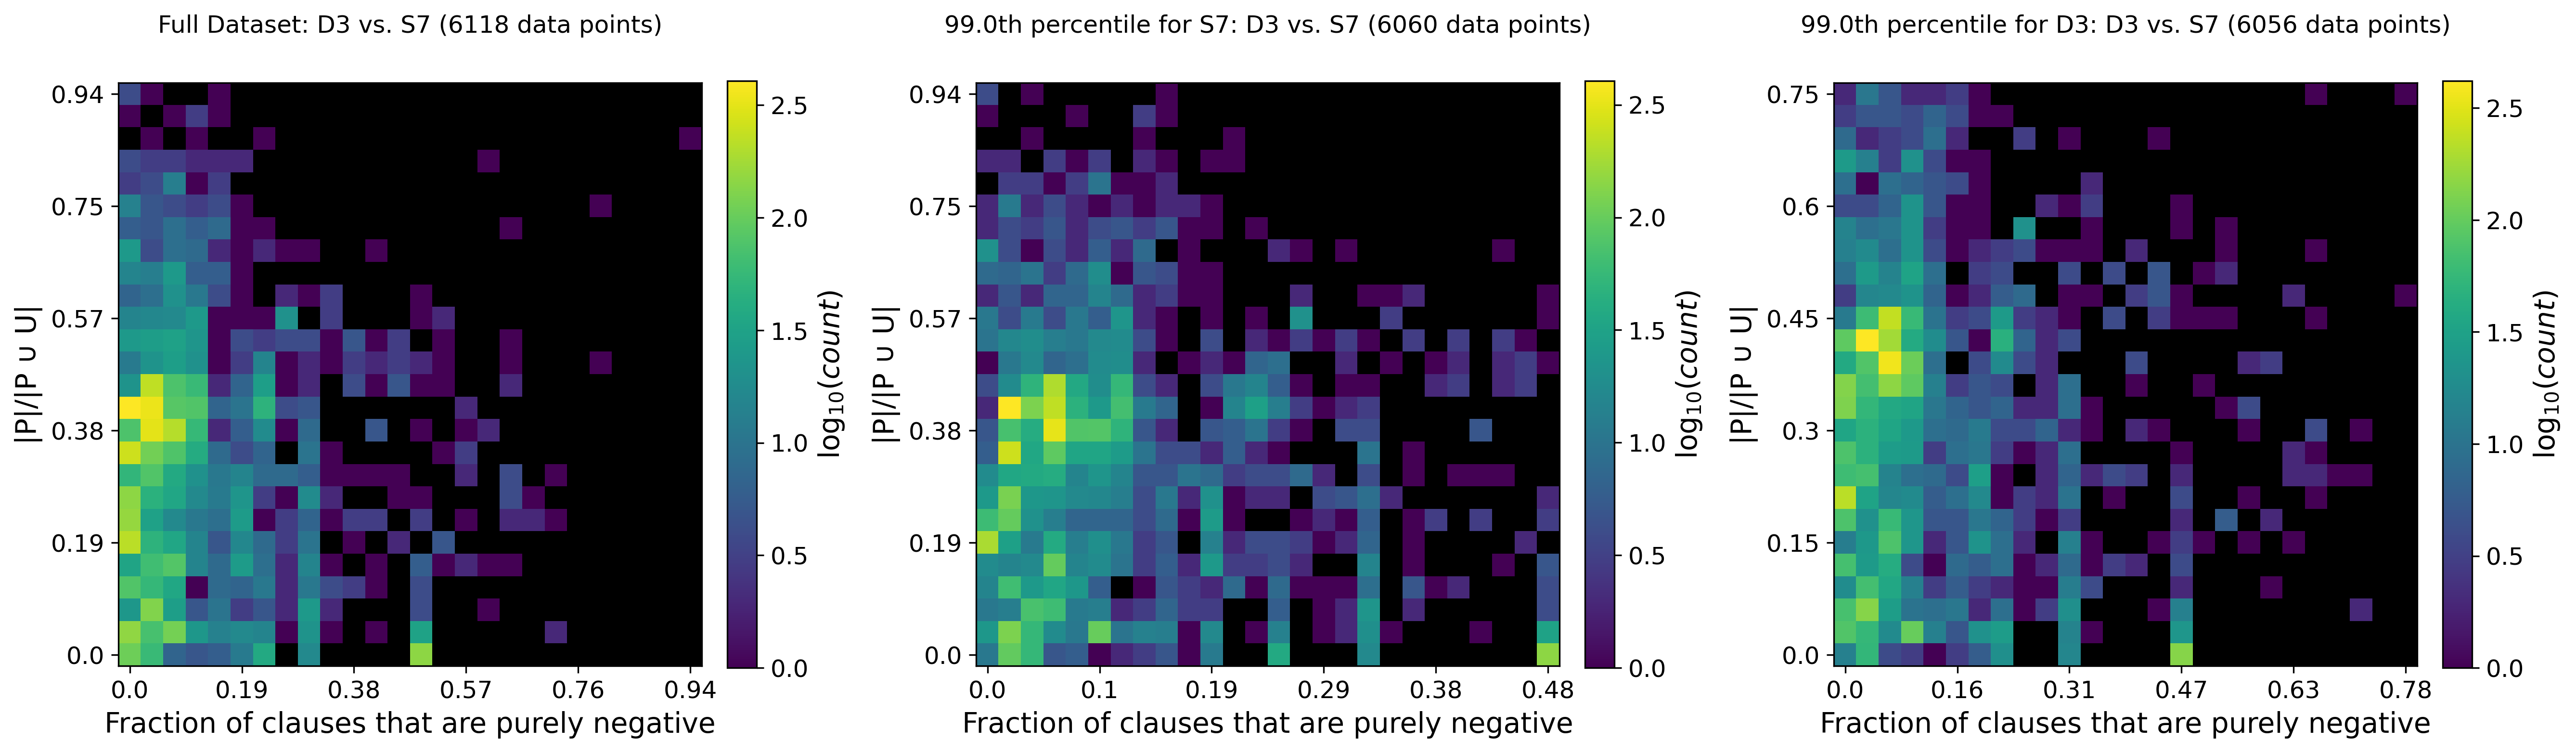

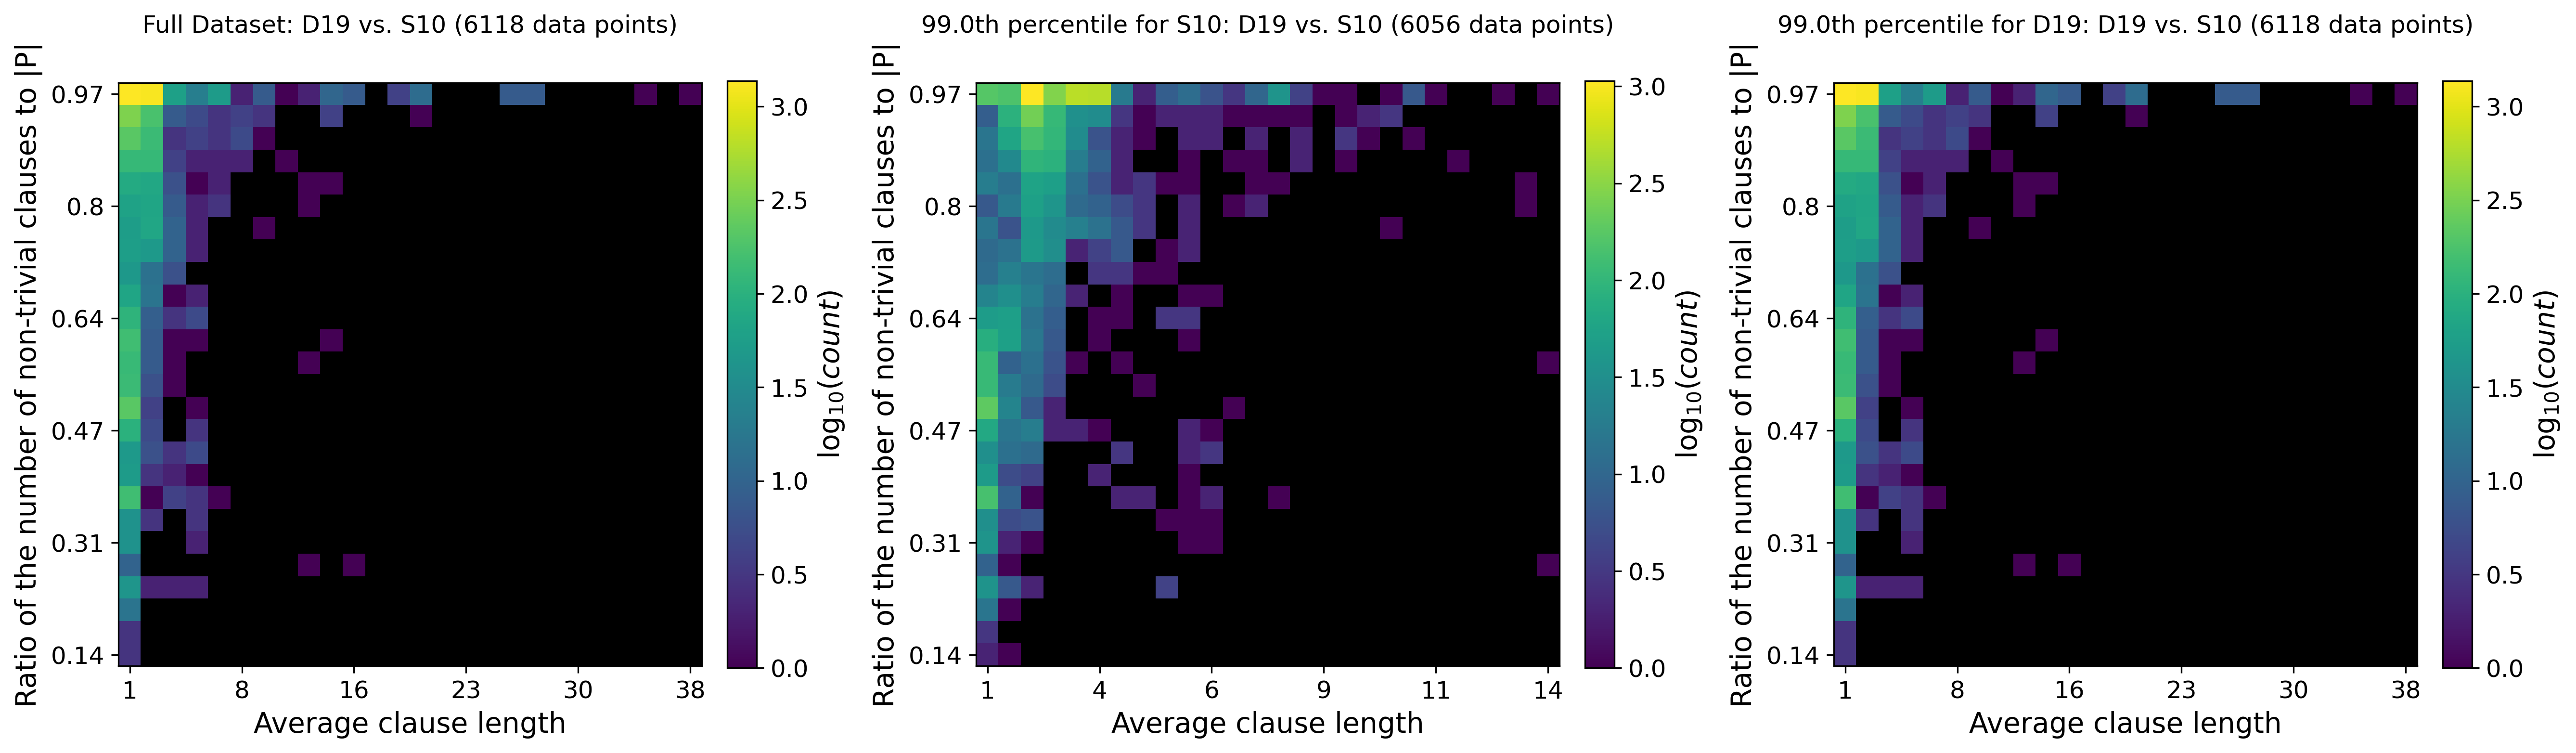

In [13]:
sd_plots_to_save = [['S2','D1'], ['S2', 'D20'], ['S6', 'D15'], ['S7','D3'], ['S10','D19']]
plt.rcParams['axes.facecolor'] = 'black'
nbins=26
for col1, col2 in sd_plots_to_save:
    q = 0.99
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
    df_col_one = df[df[col1] <= df[col1].quantile(q)].loc[:,[col1,col2]]
    df_col_two = df[df[col2] <= df[col2].quantile(q)].loc[:,[col1,col2]]
    shape0 = df.loc[:,[col1,col2]].shape[0]
    shape1 = df_col_one.shape[0]
    shape2 = df_col_two.shape[0]
    heatmap_one, xedges_one, yedges_one = np.histogram2d(df_col_one[col1], df_col_one[col2], bins=nbins)
    heatmap, xedges, yedges = np.histogram2d(df[col1], df[col2], bins=nbins)
    heatmap_two, xedges_two, yedges_two = np.histogram2d(df_col_two[col1], df_col_two[col2], bins=nbins)
    with np.errstate(divide='ignore'):
        heatmap = np.log10(heatmap)
        heatmap_one = np.log10(heatmap_one)
        heatmap_two = np.log10(heatmap_two)   
    col1_type = coltypes[col1]
    col2_type = coltypes[col2]
    for i,ax in enumerate(axes.flatten()):
        if i == 0:
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
            im = ax.imshow(heatmap.T, origin='lower', cmap=cmap)
            plt.sca(ax)
            if col1_type == 'fractionlike':
                plt.xticks(np.arange(nbins)[::5], np.round(xedges[::5], decimals=2))
            elif col1_type == 'lengthlike':
                plt.xticks(np.arange(nbins)[::5],np.round(xedges[::5]).astype(int))
            if col2_type == 'fractionlike':
                plt.yticks(np.arange(nbins)[::5], np.round(yedges[::5], decimals=2))  
            elif col2_type == 'lengthlike':
                plt.yticks(np.arange(nbins)[::5],np.round(yedges[::5]).astype(int))
            plt.colorbar(im, label='$\log_{10}(count)$',fraction=0.046, pad=0.04)
            ax.set(title='Full Dataset: {} vs. {} ({} data points)'.format(col2,col1,shape0))
            plt.xlabel(features.loc[col1,'Description'])
            plt.ylabel(features.loc[col2,'Description'])           
        elif i == 1:
            extent = [xedges_one[0], xedges_one[-1], yedges_one[0], yedges_one[-1]]
            im = ax.imshow(heatmap_one.T, origin='lower', cmap=cmap)
            plt.sca(ax)
            plt.rcParams['axes.facecolor'] = 'black'
            if col1_type == 'fractionlike':
                plt.xticks(np.arange(nbins)[::5], np.round(xedges_one[::5], decimals=2))
            elif col1_type == 'lengthlike':
                plt.xticks(np.arange(nbins)[::5],np.round(xedges_one[::5]).astype(int))
            if col2_type == 'fractionlike':
                plt.yticks(np.arange(nbins)[::5], np.round(yedges_one[::5], decimals=2))  
            elif col2_type == 'lengthlike':
                plt.yticks(np.arange(nbins)[::5],np.round(yedges_one[::5]).astype(int))
            ax.set(title='{}th percentile for {}: {} vs. {} ({} data points)'.format(100*q,col1,col2,col1,shape1))
            plt.colorbar(im, label='$\log_{10}(count)$',fraction=0.046, pad=0.04)
            plt.xlabel(features.loc[col1,'Description'])
            plt.ylabel(features.loc[col2,'Description'])
        elif i == 2:
            extent = [xedges_two[0], xedges_two[-1], yedges_two[0], yedges_two[-1]]
            im = ax.imshow(heatmap_two.T, origin='lower', cmap=cmap)
            plt.sca(ax)
            plt.rcParams['axes.facecolor'] = 'black'
            if col1_type == 'fractionlike':
                plt.xticks(np.arange(nbins)[::5], np.round(xedges_two[::5], decimals=2))
            elif col1_type == 'lengthlike':
                plt.xticks(np.arange(nbins)[::5],np.round(xedges_two[::5]).astype(int))
            if col2_type == 'fractionlike':
                plt.yticks(np.arange(nbins)[::5], np.round(yedges_two[::5], decimals=2))  
            elif col2_type == 'lengthlike':
                plt.yticks(np.arange(nbins)[::5],np.round(yedges_two[::5]).astype(int))
            ax.set(title='{}th percentile for {}: {} vs. {} ({} data points)'.format(100*q,col2,col2,col1,shape2))
            plt.colorbar(im, label='$\log_{10}(count)$',fraction=0.046, pad=0.04)
            plt.xlabel(features.loc[col1,'Description'])
            plt.ylabel(features.loc[col2,'Description'])
    plt.tight_layout()
    figname = '../figures/heatmap3_{}_{}.png'.format(col2,col1)
    plt.savefig(figname, dpi=300, format='png')
    plt.show()

#### Dynamic vs. Dynamic

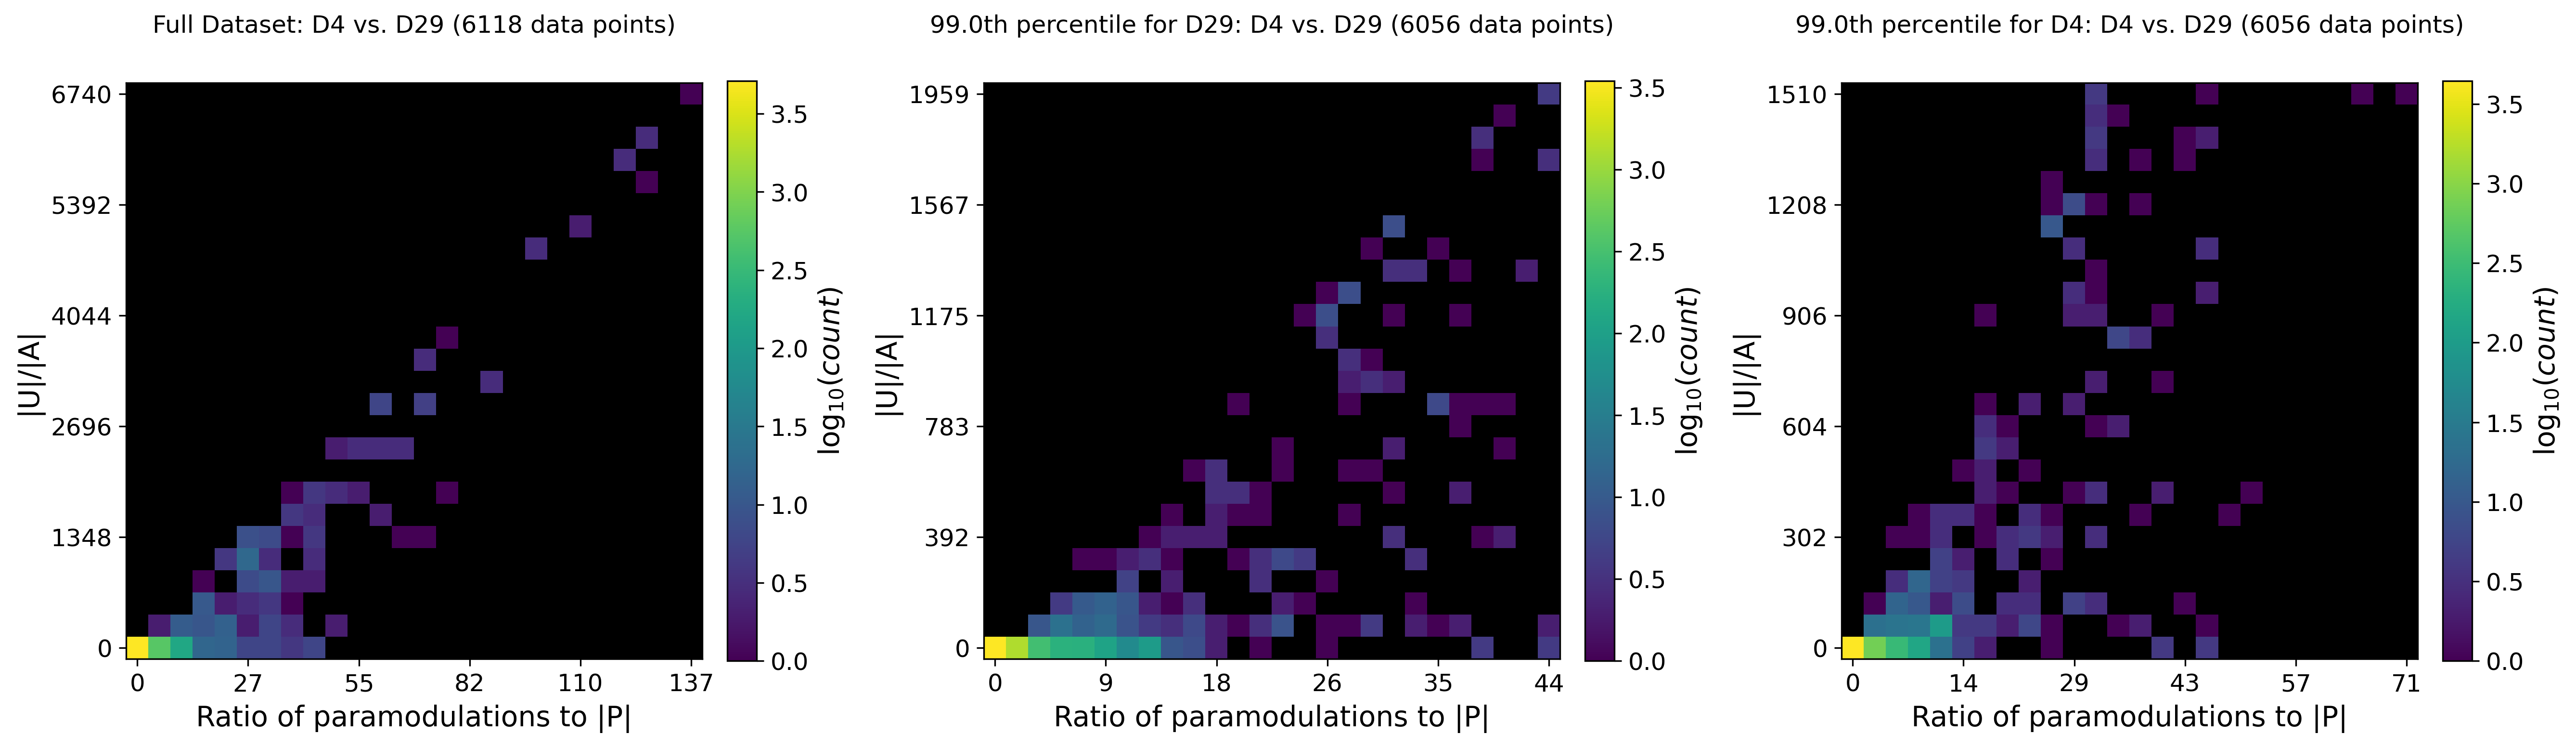

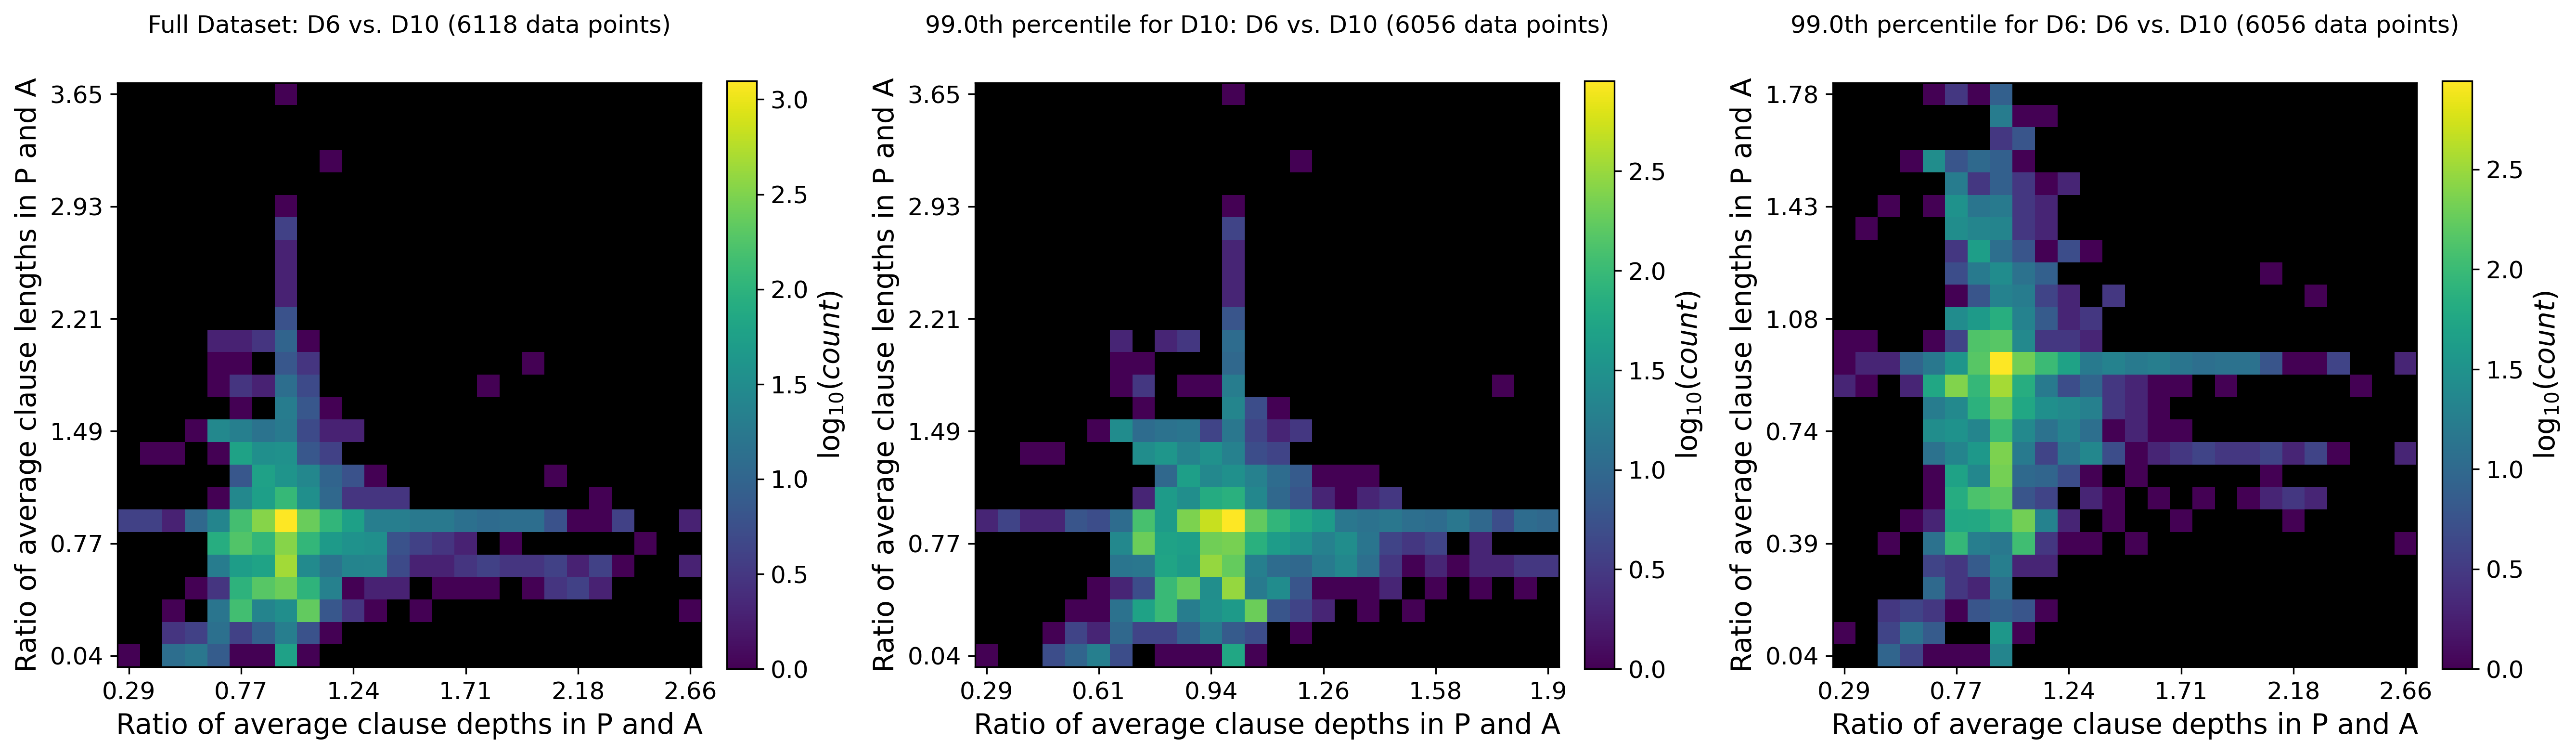

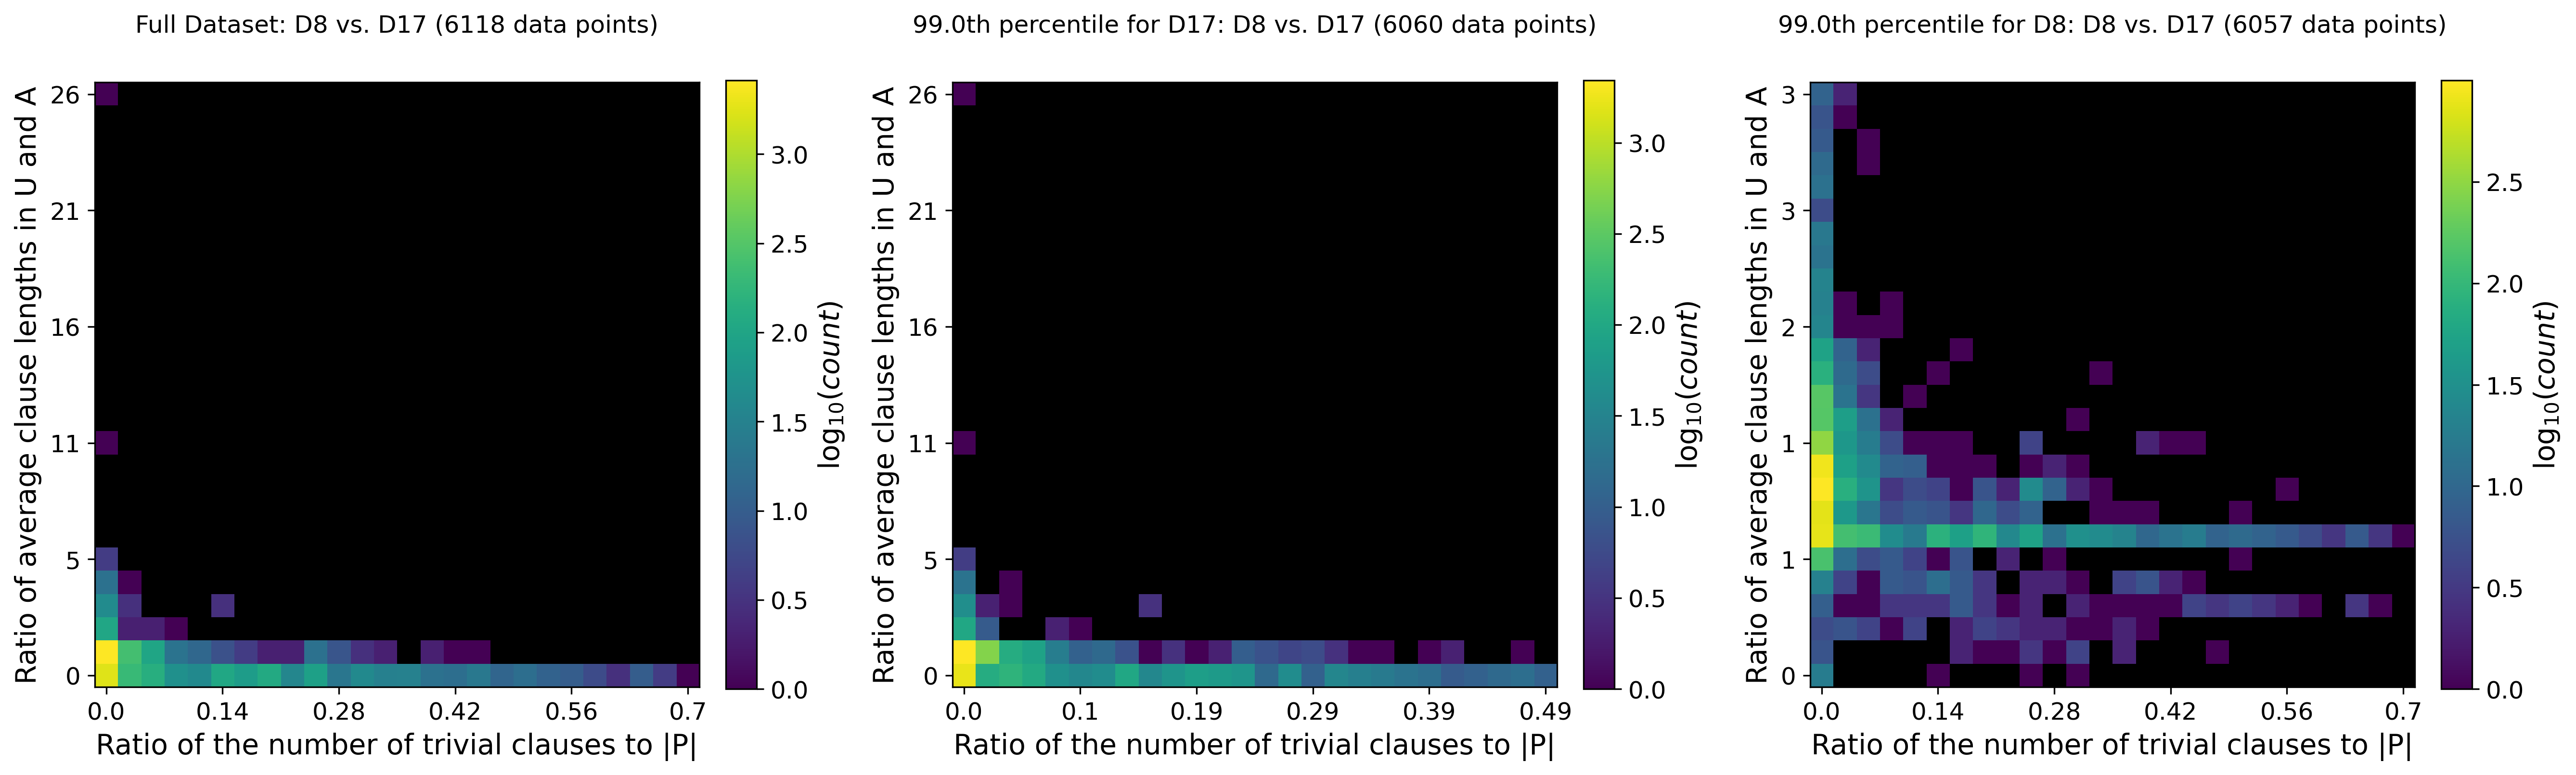

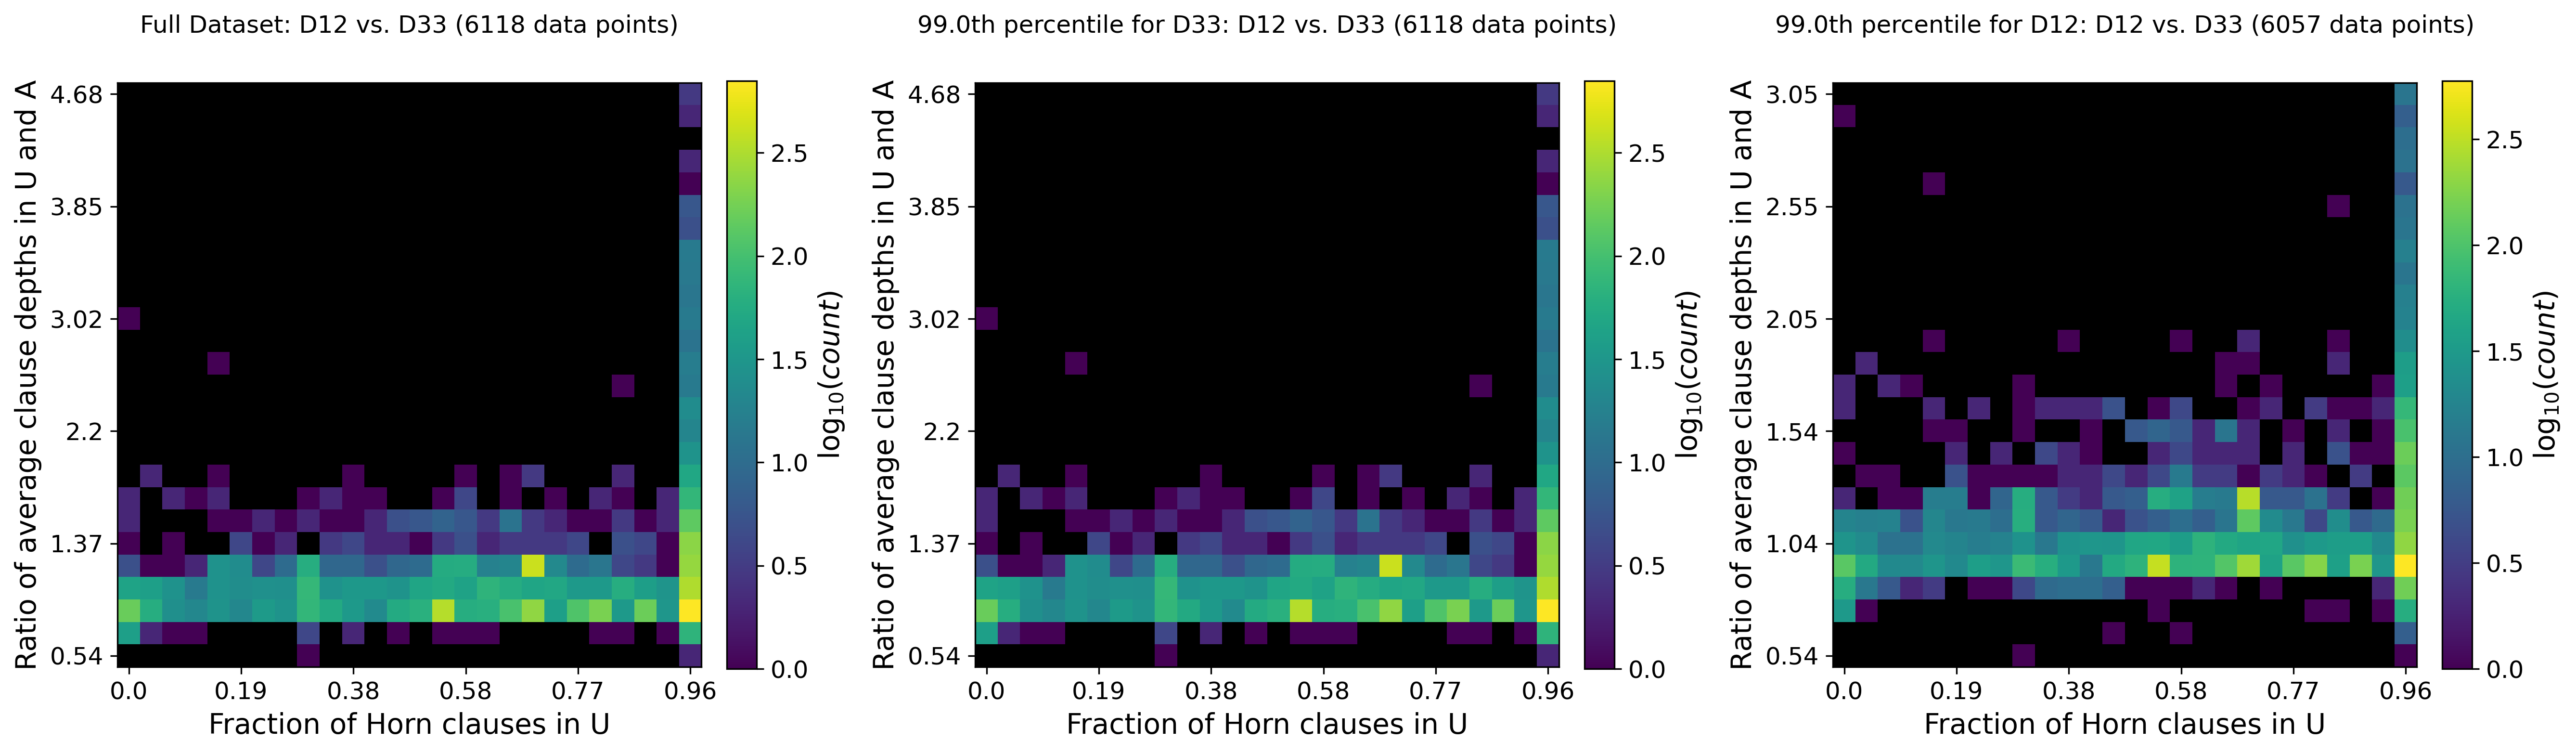

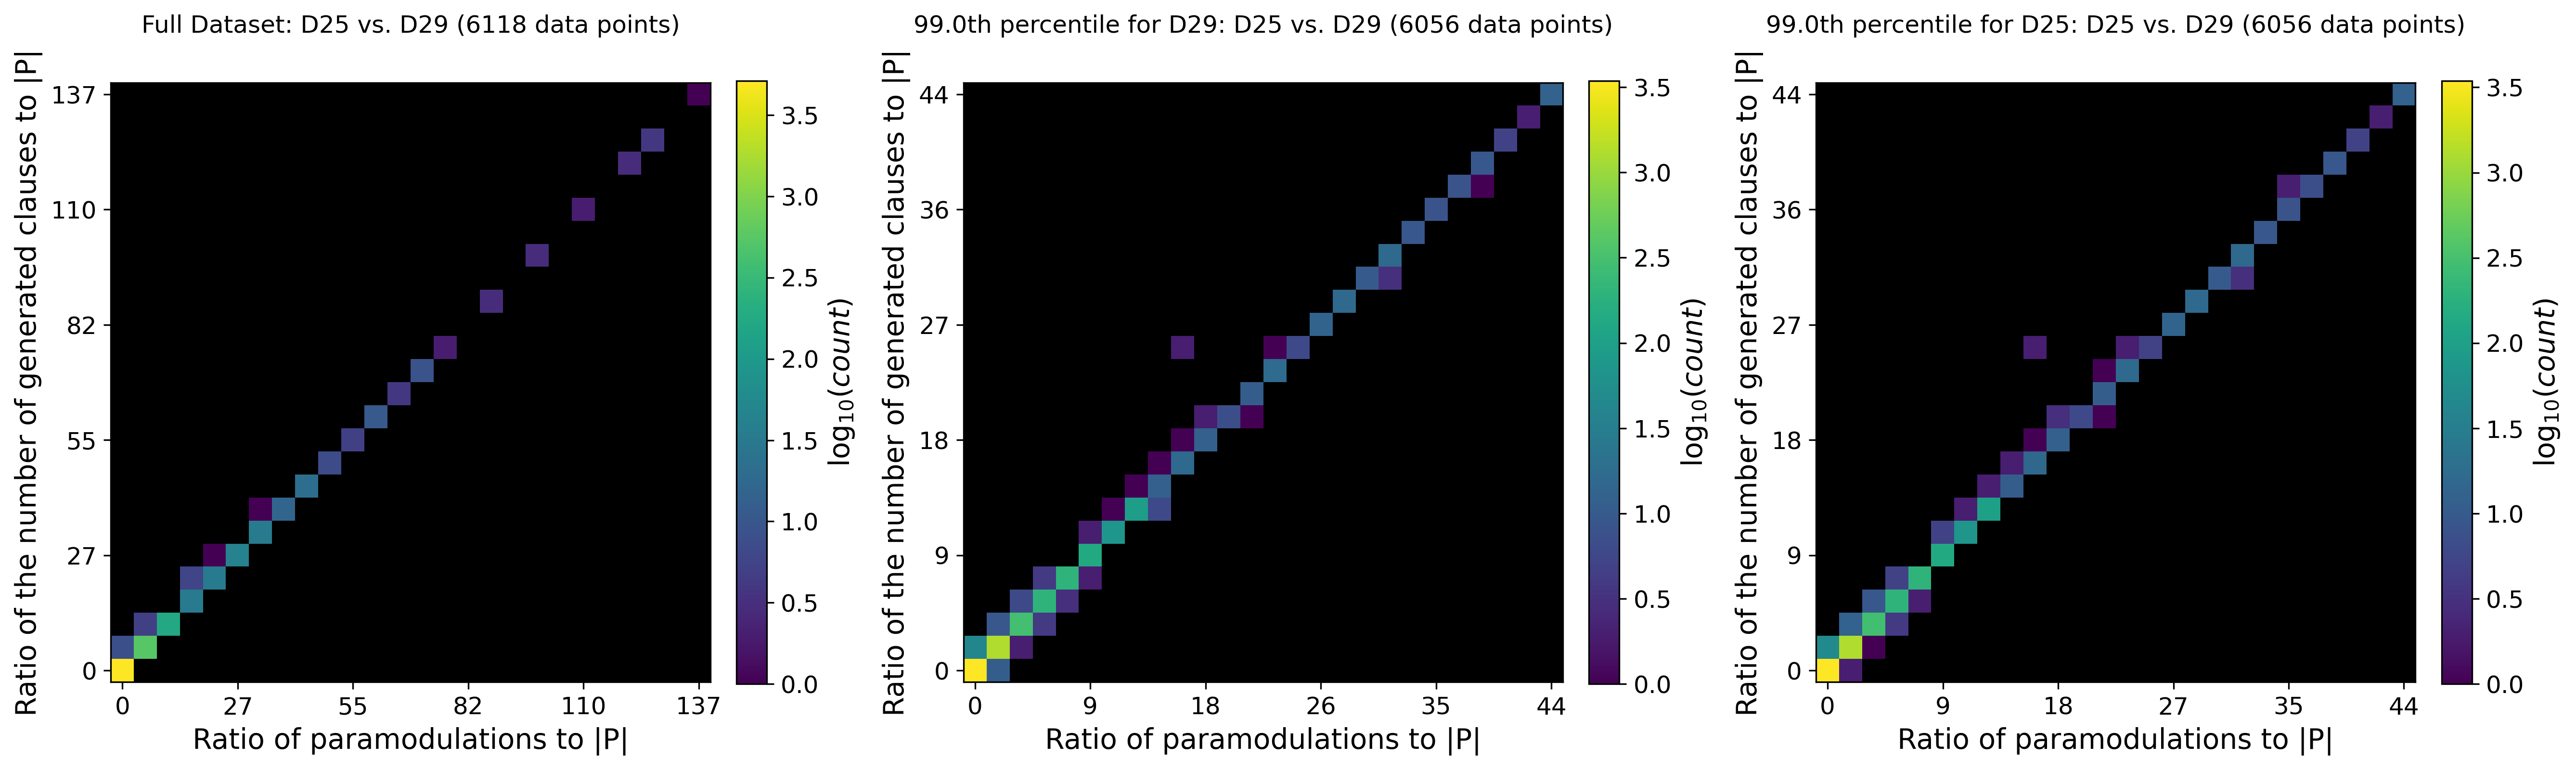

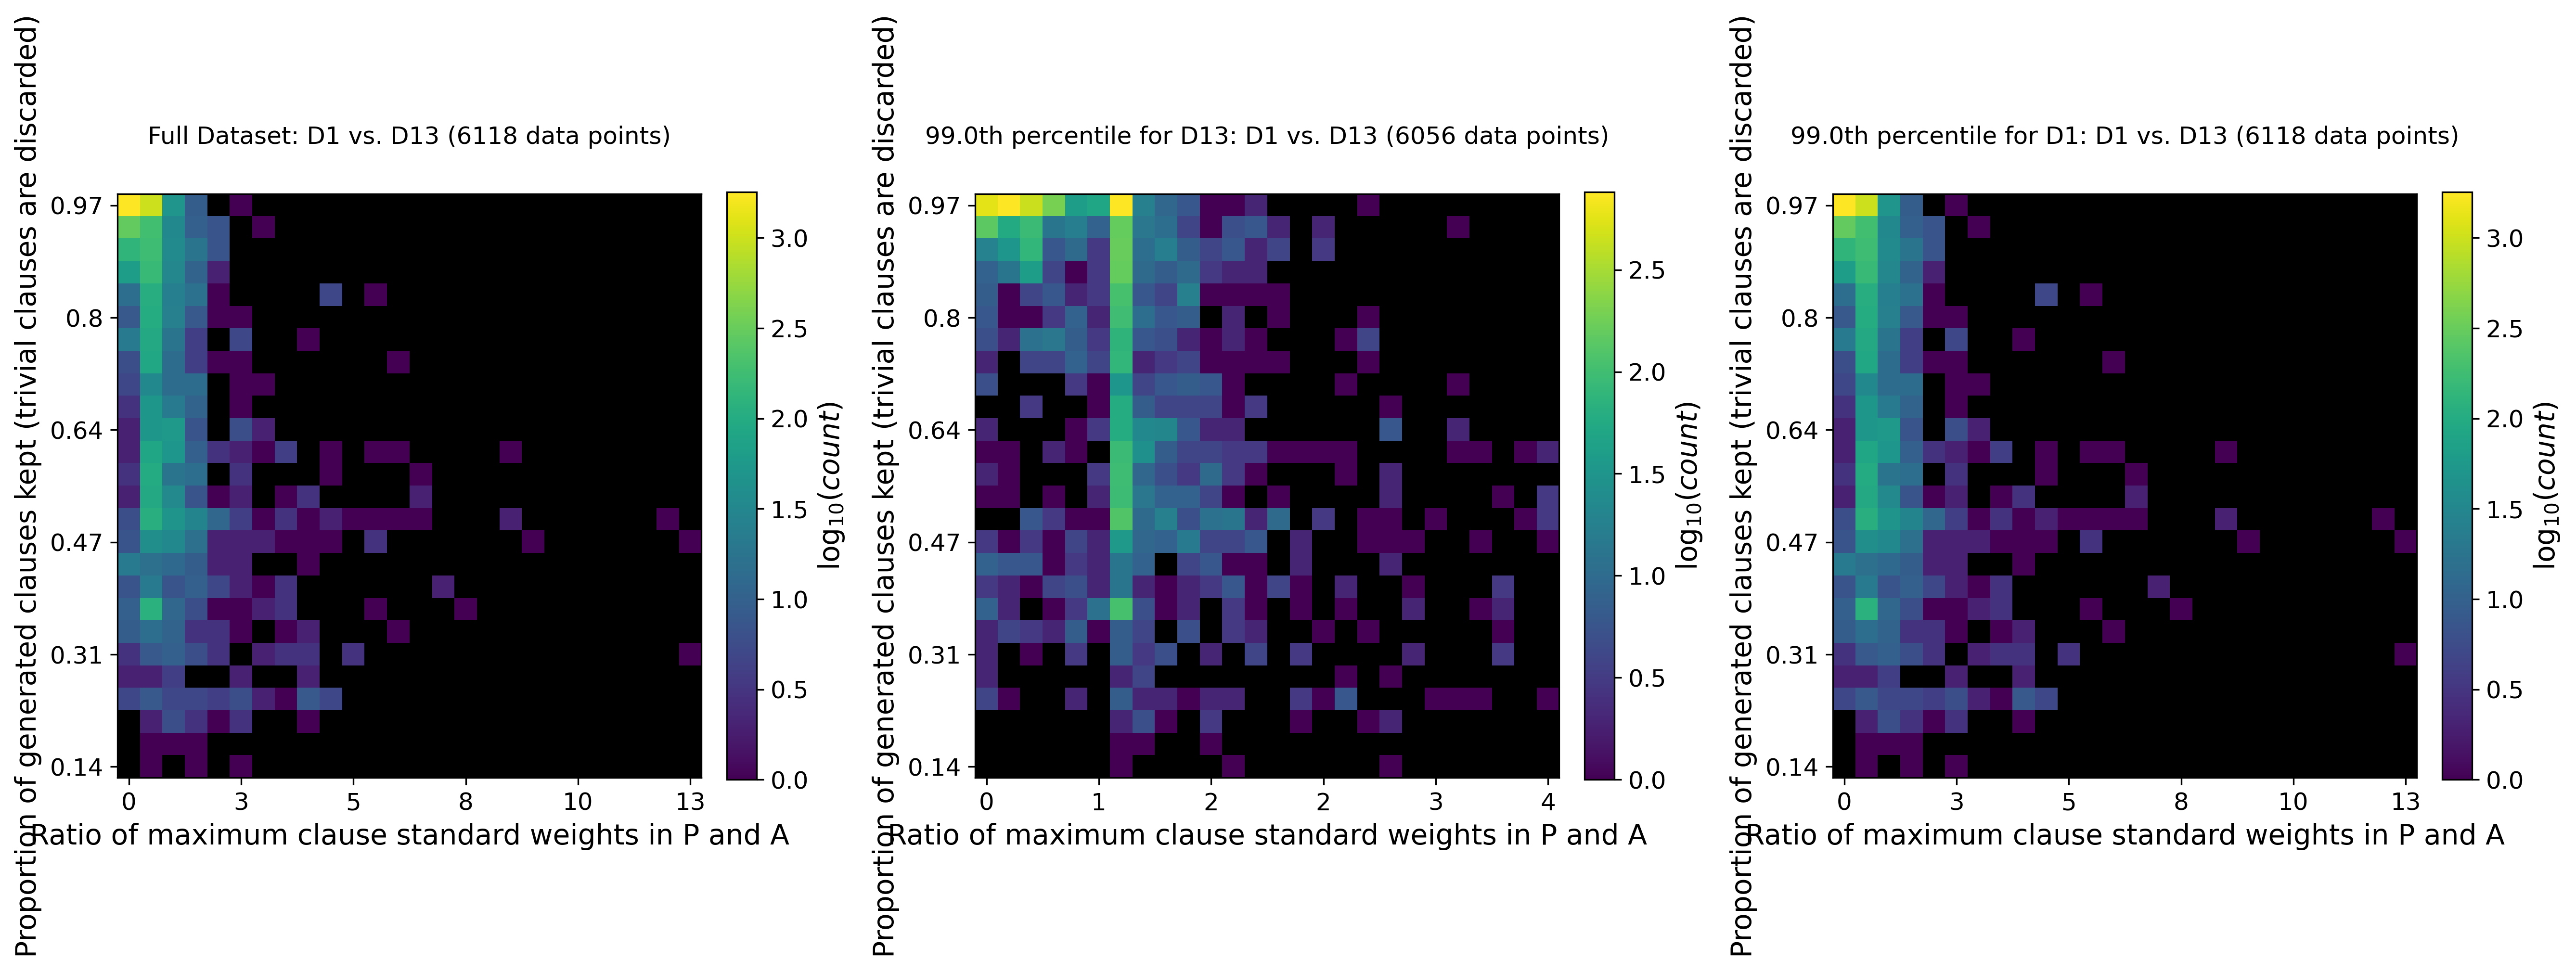

In [14]:
dd_plots_to_save = [['D29', 'D4'], ['D10', 'D6'], ['D17','D8'], ['D33','D12'], ['D29','D25'], ['D13','D1']]

for col1, col2 in dd_plots_to_save:
    q = 0.99
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
    df_col_one = df[df[col1] <= df[col1].quantile(q)].loc[:,[col1,col2]]
    df_col_two = df[df[col2] <= df[col2].quantile(q)].loc[:,[col1,col2]]
    shape0 = df.loc[:,[col1,col2]].shape[0]
    shape1 = df_col_one.shape[0]
    shape2 = df_col_two.shape[0]
    heatmap_one, xedges_one, yedges_one = np.histogram2d(df_col_one[col1], df_col_one[col2], bins=nbins)
    heatmap, xedges, yedges = np.histogram2d(df[col1], df[col2], bins=nbins)
    heatmap_two, xedges_two, yedges_two = np.histogram2d(df_col_two[col1], df_col_two[col2], bins=nbins)
    with np.errstate(divide='ignore'):
        heatmap = np.log10(heatmap)
        heatmap_one = np.log10(heatmap_one)
        heatmap_two = np.log10(heatmap_two)   
    col1_type = coltypes[col1]
    col2_type = coltypes[col2]
    for i,ax in enumerate(axes.flatten()):
        if i == 0:
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
            im = ax.imshow(heatmap.T, origin='lower', cmap=cmap)
            plt.sca(ax)
            if col1_type == 'fractionlike':
                plt.xticks(np.arange(nbins)[::5], np.round(xedges[::5], decimals=2))
            elif col1_type == 'lengthlike':
                plt.xticks(np.arange(nbins)[::5],np.round(xedges[::5]).astype(int))
            if col2_type == 'fractionlike':
                plt.yticks(np.arange(nbins)[::5], np.round(yedges[::5], decimals=2))  
            elif col2_type == 'lengthlike':
                plt.yticks(np.arange(nbins)[::5],np.round(yedges[::5]).astype(int))
            plt.colorbar(im, label='$\log_{10}(count)$',fraction=0.046, pad=0.04)
            ax.set(title='Full Dataset: {} vs. {} ({} data points)'.format(col2,col1,shape0))
            plt.xlabel(features.loc[col1,'Description'])
            plt.ylabel(features.loc[col2,'Description'])           
        elif i == 1:
            extent = [xedges_one[0], xedges_one[-1], yedges_one[0], yedges_one[-1]]
            im = ax.imshow(heatmap_one.T, origin='lower', cmap=cmap)
            plt.sca(ax)
            plt.rcParams['axes.facecolor'] = 'black'
            if col1_type == 'fractionlike':
                plt.xticks(np.arange(nbins)[::5], np.round(xedges_one[::5], decimals=2))
            elif col1_type == 'lengthlike':
                plt.xticks(np.arange(nbins)[::5],np.round(xedges_one[::5]).astype(int))
            if col2_type == 'fractionlike':
                plt.yticks(np.arange(nbins)[::5], np.round(yedges_one[::5], decimals=2))  
            elif col2_type == 'lengthlike':
                plt.yticks(np.arange(nbins)[::5],np.round(yedges_one[::5]).astype(int))
            ax.set(title='{}th percentile for {}: {} vs. {} ({} data points)'.format(100*q,col1,col2,col1,shape1))
            plt.colorbar(im, label='$\log_{10}(count)$',fraction=0.046, pad=0.04)
            plt.xlabel(features.loc[col1,'Description'])
            plt.ylabel(features.loc[col2,'Description'])
        elif i == 2:
            extent = [xedges_two[0], xedges_two[-1], yedges_two[0], yedges_two[-1]]
            im = ax.imshow(heatmap_two.T, origin='lower', cmap=cmap)
            plt.sca(ax)
            plt.rcParams['axes.facecolor'] = 'black'
            if col1_type == 'fractionlike':
                plt.xticks(np.arange(nbins)[::5], np.round(xedges_two[::5], decimals=2))
            elif col1_type == 'lengthlike':
                plt.xticks(np.arange(nbins)[::5],np.round(xedges_two[::5]).astype(int))
            if col2_type == 'fractionlike':
                plt.yticks(np.arange(nbins)[::5], np.round(yedges_two[::5], decimals=2))  
            elif col2_type == 'lengthlike':
                plt.yticks(np.arange(nbins)[::5],np.round(yedges_two[::5]).astype(int))
            ax.set(title='{}th percentile for {}: {} vs. {} ({} data points)'.format(100*q,col2,col2,col1,shape2))
            plt.colorbar(im, label='$\log_{10}(count)$',fraction=0.046, pad=0.04)
            plt.xlabel(features.loc[col1,'Description'])
            plt.ylabel(features.loc[col2,'Description'])
    plt.tight_layout()
    figname = '../figures/heatmap3_{}_{}.png'.format(col2,col1)
    plt.savefig(figname, dpi=300, format='png')
    plt.show()

## EDA of Target Variable (Class Distribution)

In [15]:
def get_unique_combos(X, y):
    lp = LabelPowerset()
    y_t = lp.transform(y)
    return lp.unique_combinations_

def print_mapping(dictionary):
    for key in dictionary.keys():
        print('{} : {}'.format(key, dictionary[key]))
        
def str_keys_to_list(string):
    return [int(num) for num in string.split(',')]

def get_powerset_counts(target, powerset):
    store_counts = {combo: 0 for combo in powerset.keys()}
    for combo in powerset.keys():
        int_list = str_keys_to_list(combo)
        pattern = np.zeros(6,dtype=int)
        for i in int_list:
            pattern[i] = 1
        for a in range(len(target)):
            if np.array_equal(target[a], pattern):
                store_counts[combo] += 1
    return store_counts

In [16]:
unique_tol = get_unique_combos(X, y_tol)
print_mapping(unique_tol)

arr_y_tol = np.array(y_tol)
counts_tol = get_powerset_counts(arr_y_tol, unique_tol)

sorted_counts_tol = OrderedDict(sorted(counts_tol.items(), key=lambda k: k[1]))
counts_tol_df = pd.DataFrame(sorted_counts_tol.values(), index=sorted_counts_tol.keys(), columns=['tol-count'])

0 : 0
1,2,4,5 : 1
3 : 2
4,5 : 3
2,3 : 4
5 : 5
1,3 : 6
1,2,3,4,5 : 7
2 : 8
2,3,5 : 9
1,2,3 : 10
3,5 : 11
2,3,4,5 : 12
1,3,4,5 : 13
1 : 14
4 : 15
1,4,5 : 16
1,3,5 : 17
2,4,5 : 18
3,4,5 : 19
1,4 : 20
1,5 : 21
1,2 : 22
2,4 : 23
1,2,4 : 24
1,3,4 : 25
1,2,3,4 : 26
2,5 : 27
2,3,4 : 28
3,4 : 29
1,2,3,5 : 30
1,2,5 : 31


In [17]:
omap = {'0': 2554, '1': 1089, '3': 748, '4': 617, '2': 486, '5': 624}

col = [omap['0'], omap['3'], omap['1'], omap['5'], 0, omap['4'], omap['2'] ] + [0] * 25
col = col[::-1]

column_to_add = pd.Series(col, index=counts_tol_df.index)
counts_tol_df['orig-count'] = column_to_add

counts_tol_df_sort = counts_tol_df.sort_values(by=['orig-count', 'tol-count'], axis=0)
counts_tol_df_sort

tol-count  orig-count
1,2,3,5            7           0
1,2,5              7           0
2,5                9           0
2,3,4             10           0
3,4               10           0
1,3,4             12           0
2,3,5             15           0
2,4,5             15           0
1,5               21           0
1,2,3             22           0
2,4               25           0
1,2,3,4           29           0
1,3,5             35           0
3,4,5             39           0
2,3,4,5           41           0
1,2               45           0
2,3               48           0
1,3               54           0
1,2,4,5           68           0
1,2,4             76           0
1,4               85           0
3,5              103           0
1,4,5            117           0
4,5              133           0
1,3,4,5          145           0
1,2,3,4,5        382           0
2                242         486
4                360         617
5                421         624
3                525         748
1                463        1089
0               2554        2554

In [18]:
print('num classes:', counts_tol_df.shape[0])

num classes: 32


In [19]:
LP = LabelPowerset()
y_transformed = LP.transform(y_tol)
df['y'] = y_transformed

In [20]:
def autolabel(rects, ytext_coord=0):
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(30,ytext_coord), 
                    textcoords='offset points',clip_on=True,
                    ha='center', va='center', fontsize=9)

In [21]:
vals_to_plot = counts_tol_df_sort
start_index = 26
print(vals_to_plot)

           tol-count  orig-count
1,2,3,5            7           0
1,2,5              7           0
2,5                9           0
2,3,4             10           0
3,4               10           0
1,3,4             12           0
2,3,5             15           0
2,4,5             15           0
1,5               21           0
1,2,3             22           0
2,4               25           0
1,2,3,4           29           0
1,3,5             35           0
3,4,5             39           0
2,3,4,5           41           0
1,2               45           0
2,3               48           0
1,3               54           0
1,2,4,5           68           0
1,2,4             76           0
1,4               85           0
3,5              103           0
1,4,5            117           0
4,5              133           0
1,3,4,5          145           0
1,2,3,4,5        382           0
2                242         486
4                360         617
5                421         624
3         

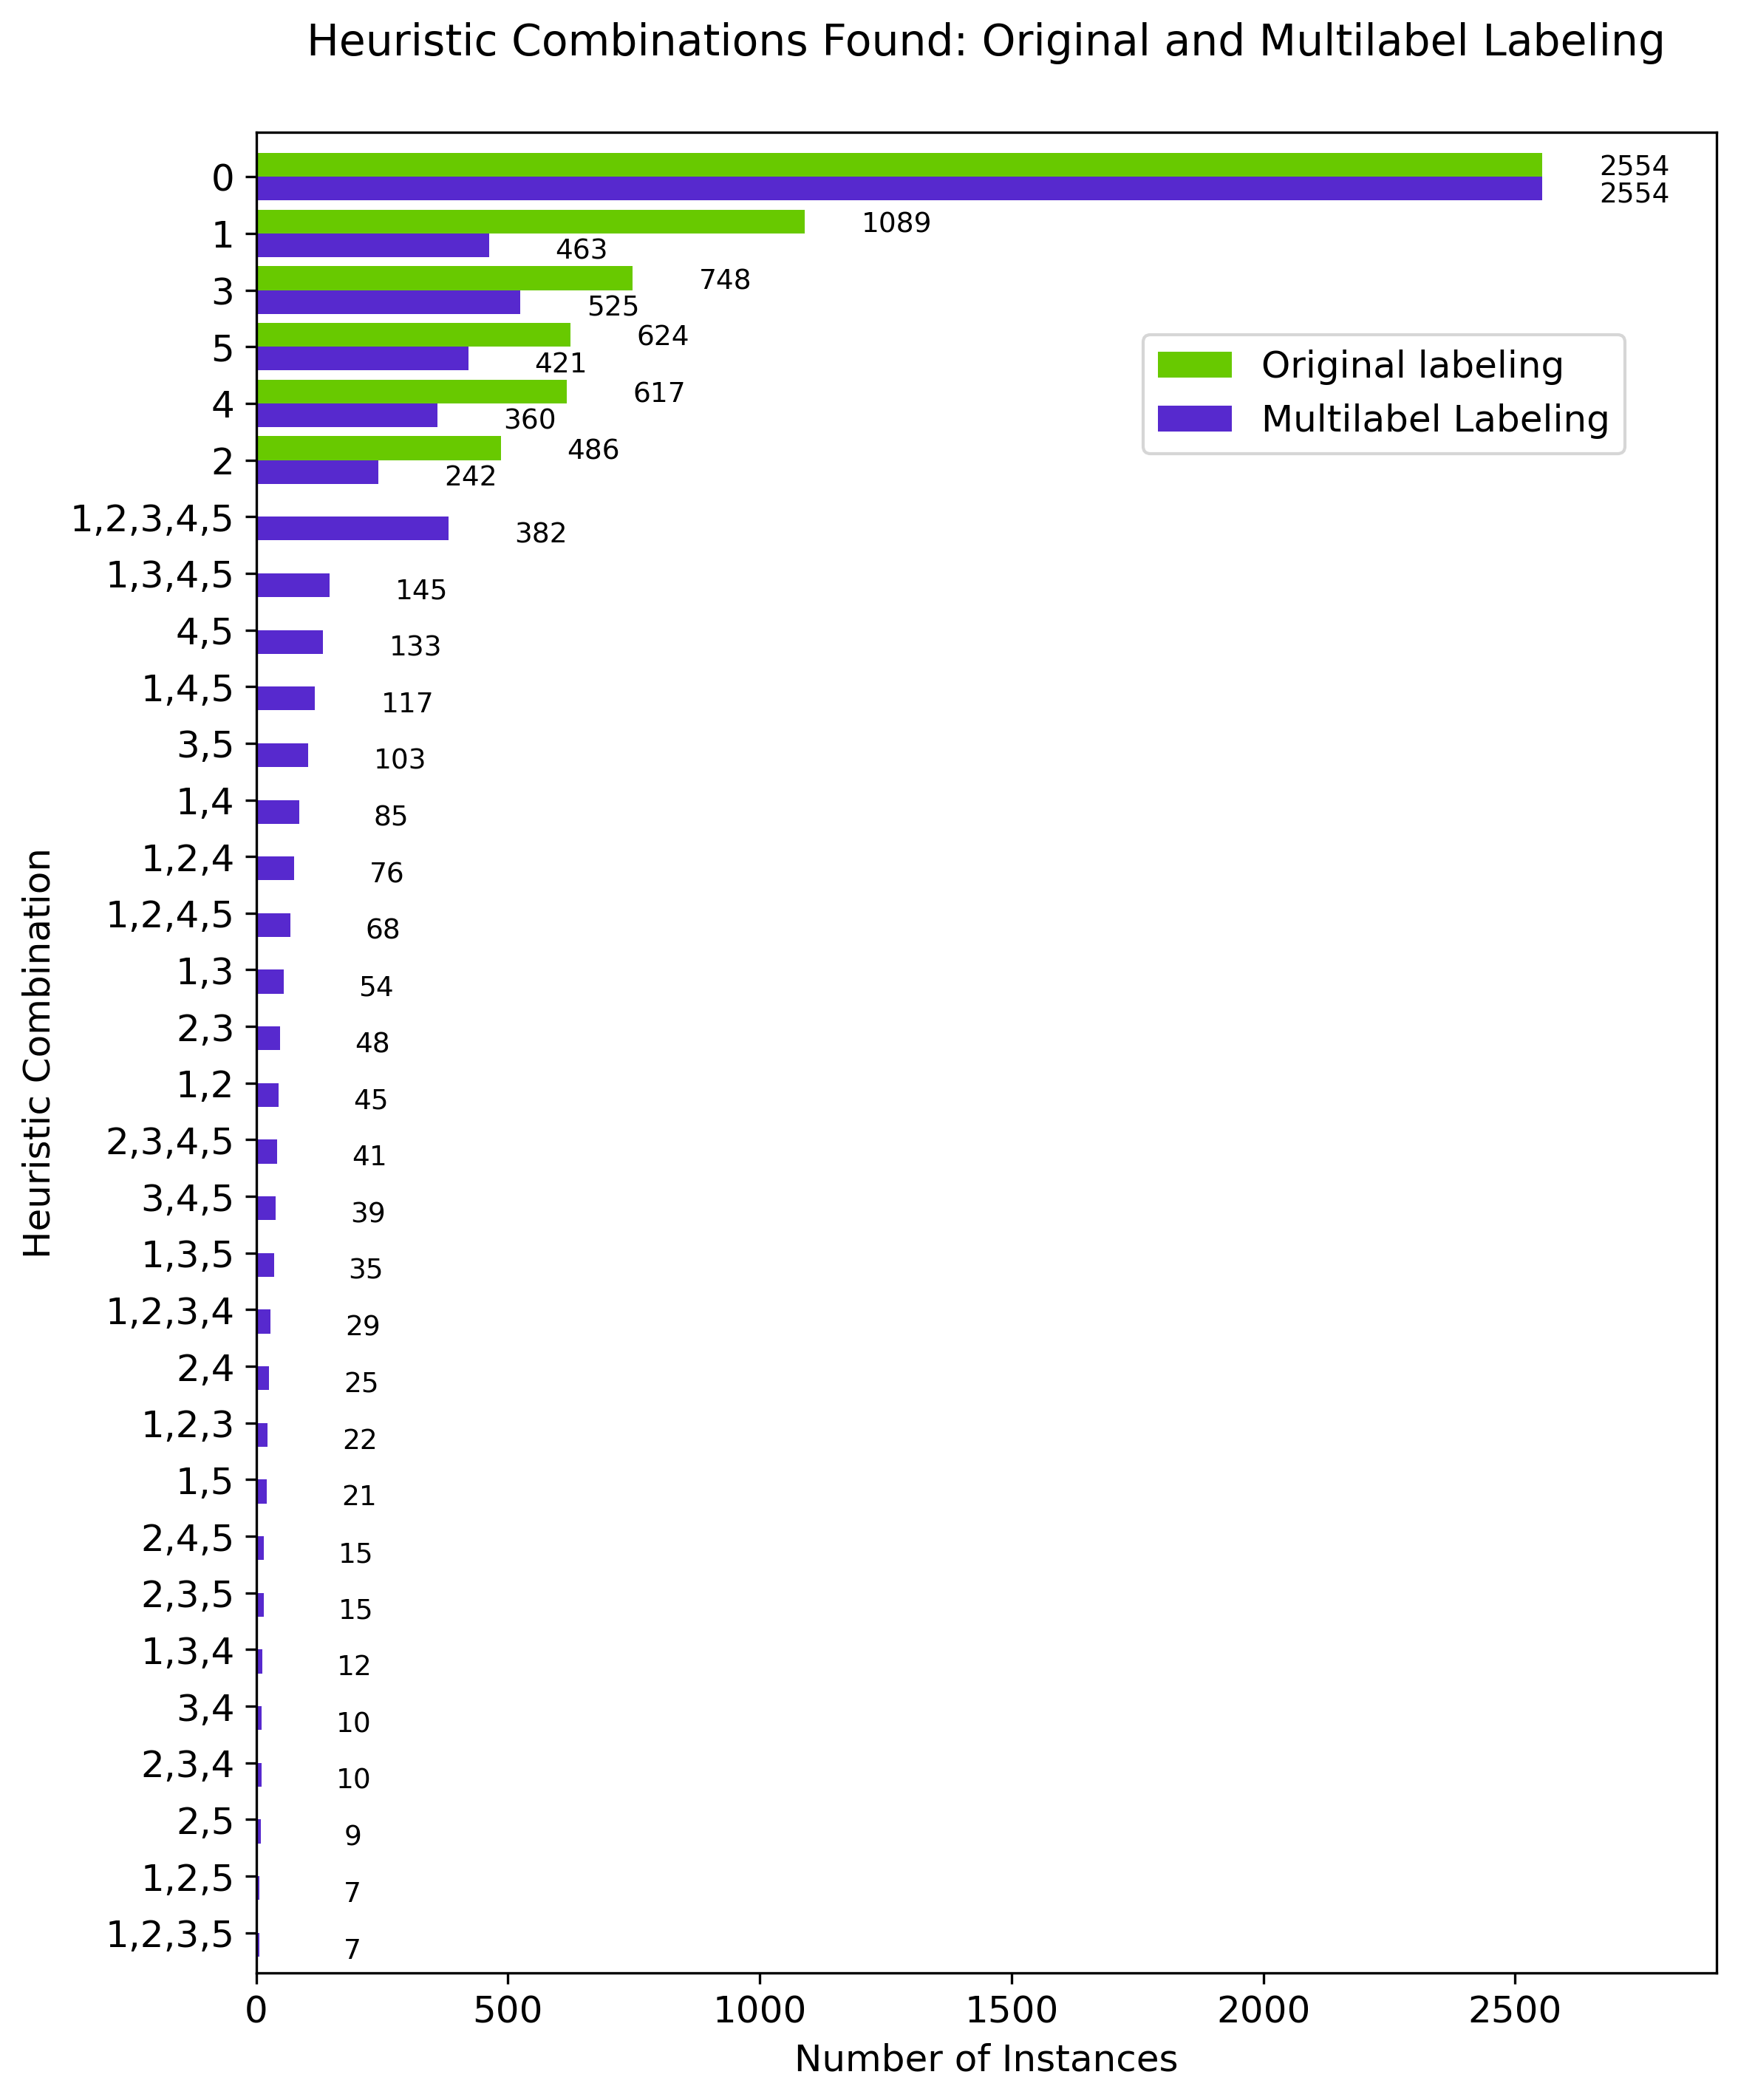

In [22]:
colorA, colorB = '#68c900', 'xkcd:blue purple'

plt.rcParams['axes.facecolor'] = 'white'

fig,ax = plt.subplots(figsize=(8.5,11))
ind = np.arange(vals_to_plot['orig-count'].values.shape[0])
width=0.42

rects1 = ax.barh(ind+width, vals_to_plot['orig-count'].values, width, label='Original labeling', color=colorA)
rects2 = ax.barh(ind, vals_to_plot['tol-count'].values, width, label='Multilabel Labeling', color=colorB)

plt.yticks(ind+width/2, vals_to_plot.index, fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, 2900)
plt.ylim(-0.5, 32)
autolabel(rects1[start_index:], -1)
autolabel(rects2, -2)
plt.legend(bbox_to_anchor=(0.95, 0.9))

plt.xlabel("Number of Instances", fontsize=12)
plt.ylabel("Heuristic Combination", fontsize=12)
ttl = plt.title("Heuristic Combinations Found: Original and Multilabel Labeling", fontsize=14)
ttl.set_position([.5, 1.01])
plt.savefig("../figures/heuristic_labeling_modified.png", dpi = 300)
plt.show()

In [23]:
SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE, dpi=300)  # fontsize of the figure title


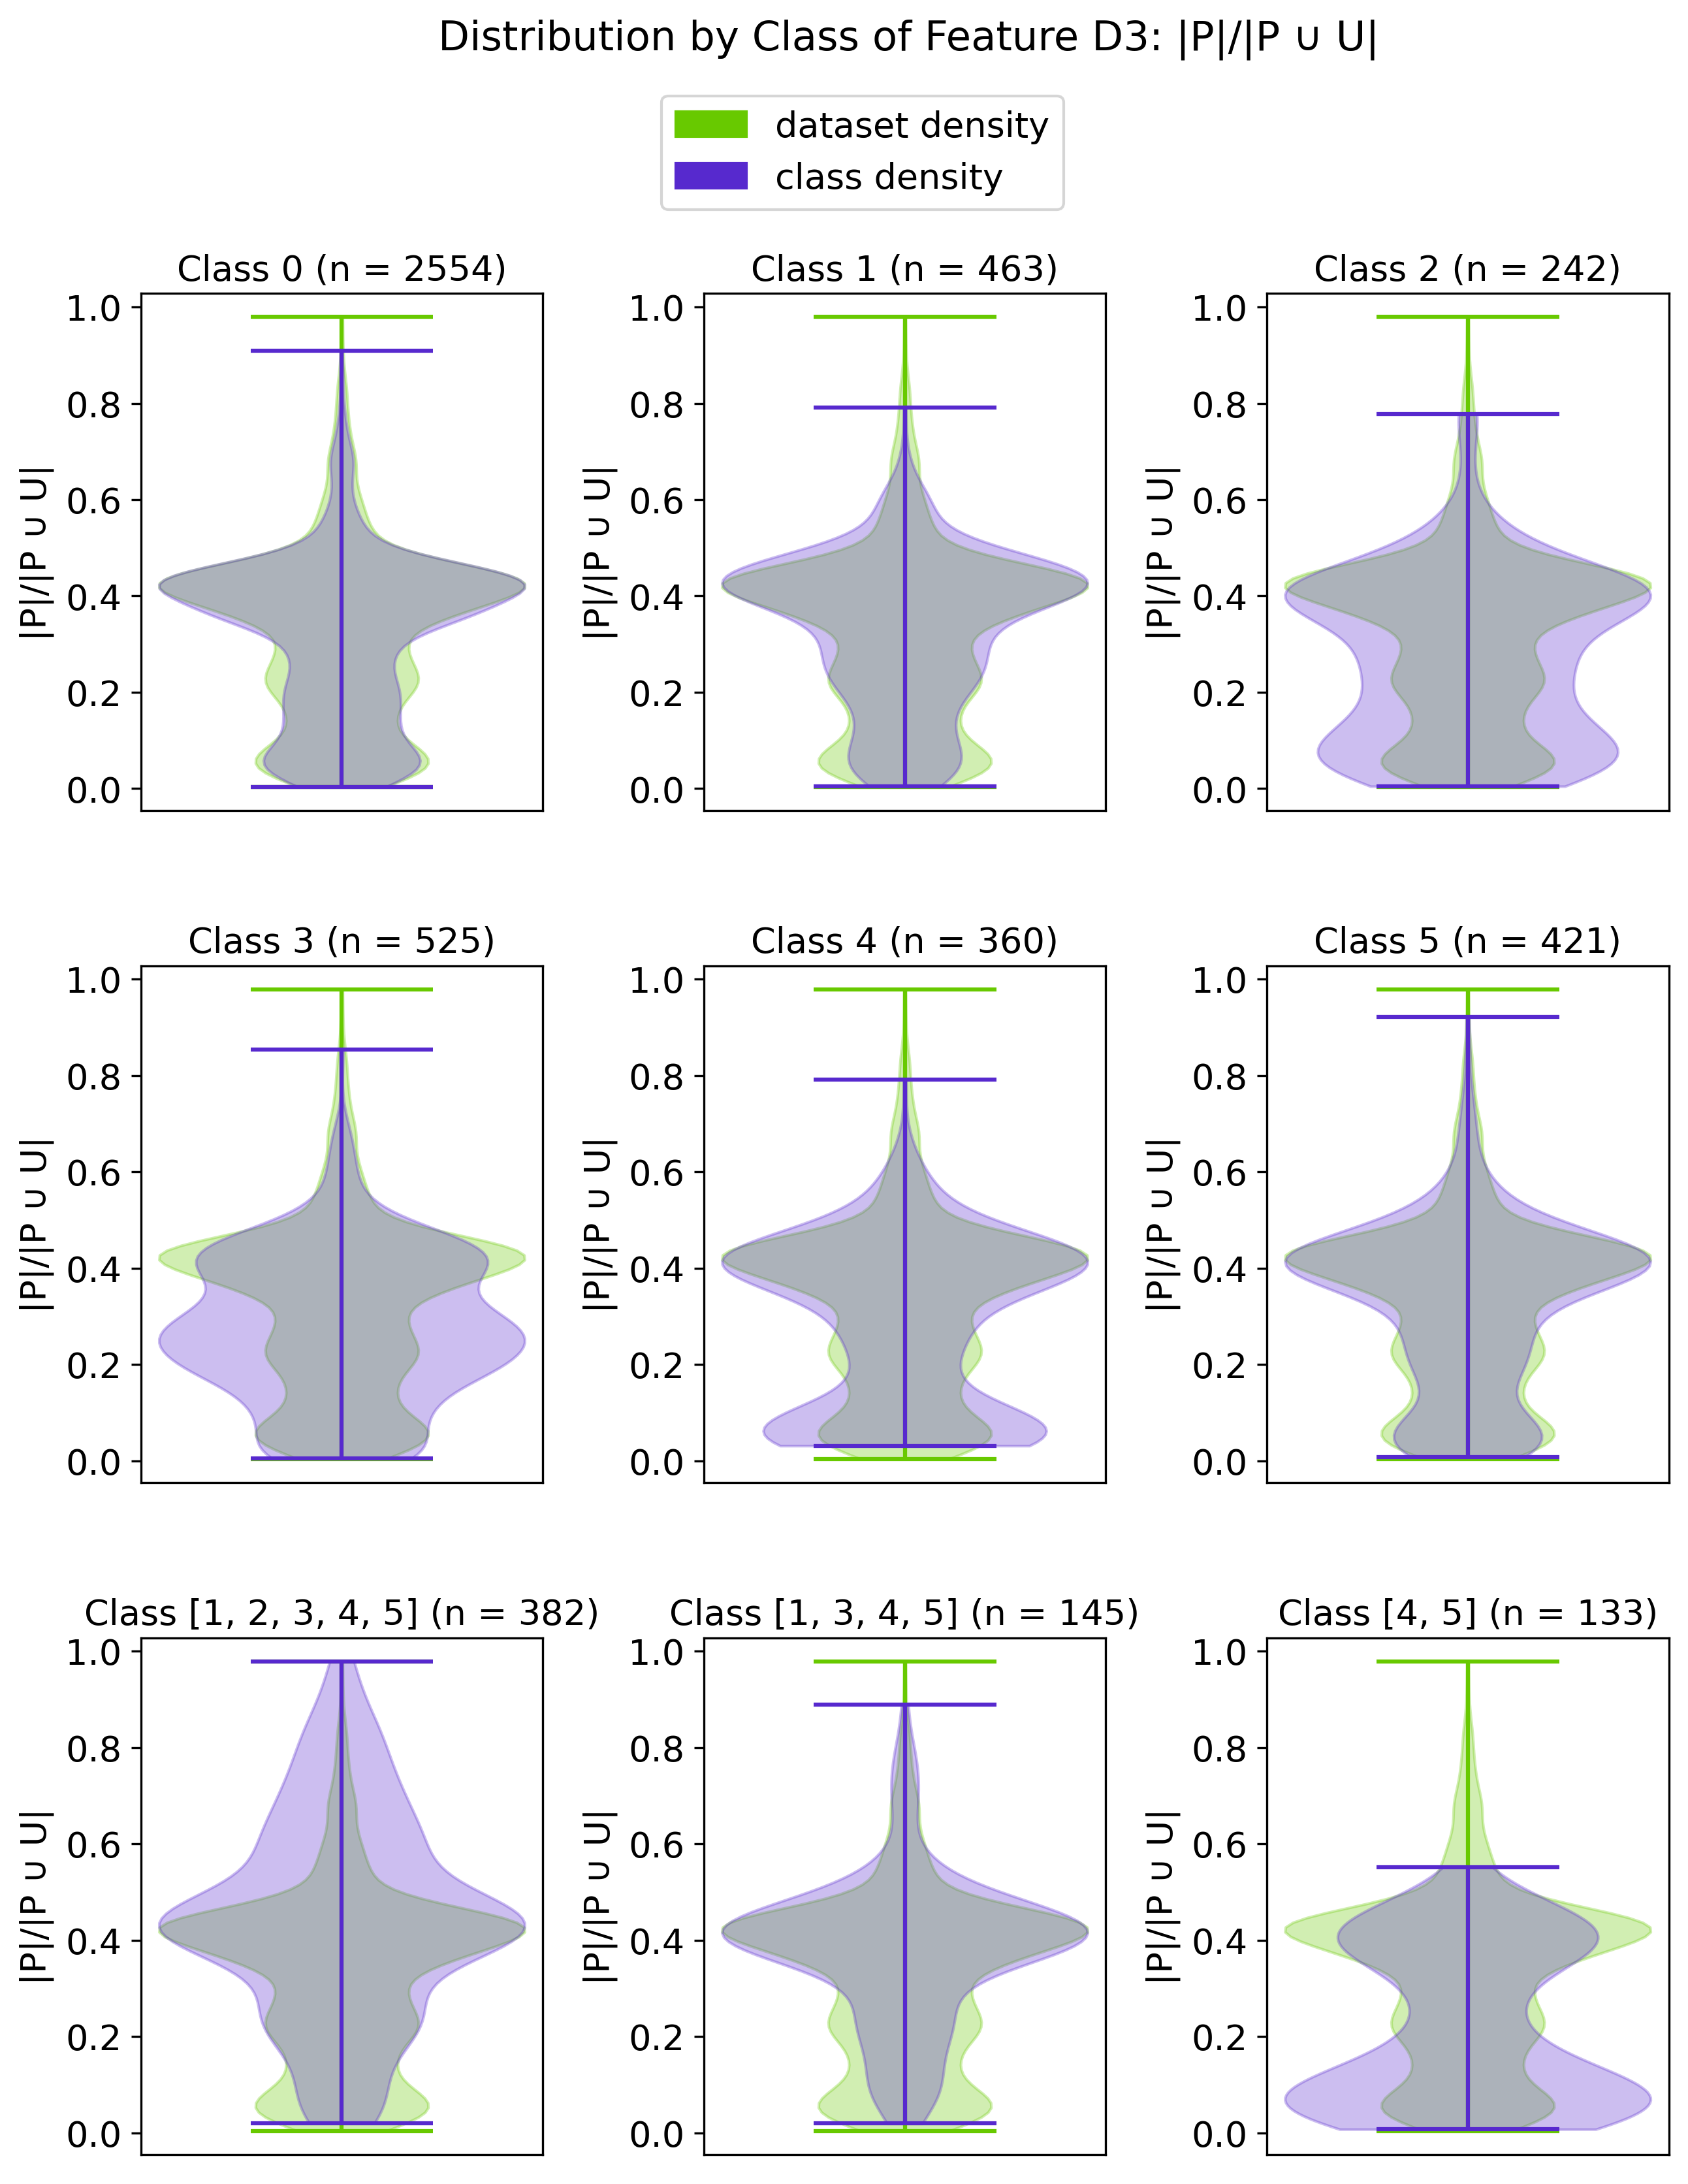

In [24]:
index = [0,1,2,3,4,5,6,7,8] #,9,10,11,12,13]

class_index = [0, 14, 8, 2, 15, 5, 7, 13, 3] #, 16, 11, 20, 24, 1]
old_class_index = [0, 1, 2, 3, 4, 5, [1,2,3,4,5], [1,3,4,5], [4,5]] #, [1,4,5], [3,5],[1,4], [1,2,4], [1,2,4,5]]

plt.rcParams['axes.facecolor'] = 'white'
for var in ['D3']: #['S6', 'D3', 'D37', 'D39']:
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,10)) 
    description = features.loc[var,'Description']
    plt.setp(axes, xticks=[], xticklabels=[], ylabel = description)
    plt.suptitle('Distribution by Class of Feature {}: {}'.format(var, description), x=0.615, y=1.09)#y=1.26)
    datafull = df[var].values
    for ax, class_label, idx in zip(axes.flatten(), class_index, index):
        datasubset = df[df['y'] == class_label][var].values
        num_pts = (df['y'] == class_label).astype(int).sum()
        ax.set_title('Class {} (n = {})'.format(old_class_index[idx], num_pts), pad=5)
        full_patch = mpatches.Patch(color=colorA, label='dataset density')
        parts = ax.violinplot(dataset=datafull)
        
        for pc in parts['bodies']:
            pc.set_facecolor(colorA)
            pc.set_edgecolor(colorA)
            pc.set_alpha(0.3)
        parts['cmins'].set_color(colorA)
        parts['cmaxes'].set_color(colorA)
        parts['cbars'].set_color(colorA)
        
        class_dist_patch = mpatches.Patch(color=colorB, label='class density')
        parts2 = ax.violinplot(dataset=datasubset)
        for pc in parts2['bodies']:
            pc.set_facecolor(colorB)
            pc.set_edgecolor(colorB)
            pc.set_alpha(0.3)
        parts2['cmins'].set_color(colorB)
        parts2['cmaxes'].set_color(colorB)
        parts2['cbars'].set_color(colorB)

    fig.legend(handles=[full_patch, class_dist_patch], loc=1, bbox_to_anchor=(0.725, 1.06))#23)
    fig.subplots_adjust(top=0.95, bottom = 0, right=1.1, wspace = 0.4, hspace=0.30)
    plt.savefig('../figures/violin_plot_variable_{}_by_class.png'.format(var), dpi=300, bbox_inches='tight')
    plt.show()  